# **Capstone Project - Covid 19 Diagnosis**

---------------
## **Project background and Context**
---------------
A novel coronavirus was swiftly identified as the cause of a new respiratory illness, whose first known case was reported in late November 2019. The COVID-19, caused by the SARS-CoV-2, was described by the World Health Organization (WHO) because the virus's unchallenged spread was declared a pandemic on March 11th, while the exponential rise in the number of cases threatened to overwhelm health systems worldwide with a demand for hospitalization and for ICU beds far above the capacity, with regions of Italy serving as notable examples.

Brazil reported the first SARS-CoV-2 case on February 26. After a quick transition from international to local and then community transmission, the federal authorities declared widespread community transmission on March 20. The county of So Paulo, which has a population of around 12 million and is home to Hospital Israelita Albert Einstein, has 477 confirmed cases and 30 linked deaths as of March 23. As of March 27, the state of So Paulo had 1,223 confirmed cases of COVID-19, with 68 related deaths.

In an attempt to stop the virus's spread throughout the nation and to reduce the number of serious hospitalizations, the state and county of So Paulo made the decision to enact quarantine and social segregation measures, which were implemented at least until early April. One of the reasons for this issue was the fact that testing every case with some mild symptoms, such as cold and cough or suffering from mild fever, would be impractical in the context of an overburdened health system with the potential limitation to performing tests for the detection of SARS-CoV-2, and test results could be delayed because of the increased number of people complaining about mild symptoms & going for test Therefore, it is crucial to make some recommendations to the hospital in acceptance of patient into hospital. Setting up requirements for testing was crucial in order to concentrate on receiving test results quickly and also to stop the virus's spread as soon as possible.

## **Problems you want to find answers**

Based on the laboratory tests collected from the suspected cases, improve a classification model that predicts the chances of being positive/negative for covid19 

What features could influence in the acceptance of patient into hospital?

-----------------
## **Objective**
-----------------
* Pre-processing and missing data analysis.
* Exploratory Data Analysis, Data Wrangling and visualize the dataset.
* Predict the likelihood of testing positive or negative for COVID19 and the variables that may affect it based on the laboratory tests that were gathered from the suspected cases.
* Also, provide the recommendations to the hospital on how they can better manage the admission of patients to the
general ward, semi-intensive unit, or intensive care unit.

-----------------
## **About the dataset**
-----------------
This dataset includes anonymized information from patients who visited the Hospital Israelita Albert Einstein in So Paulo, Brazil, and had samples taken for the SARS-CoV-2 RT-PCR and other laboratory procedures. In accordance with the finest international standards and guidelines, all data were anonymised. A mean of zero and a unit standard deviation were used to standardize all clinical data. 
The dataset's variables all have clear explanations.

## **Importing the necessary libraries**

In [1]:
import warnings                                                  # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                                               # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                                  # Basic library for data visualization
import seaborn as sns                                            # Slightly advanced library for data visualization
import plotly.graph_objs as go                                   # More advanced library for data visualization
from sklearn.model_selection import train_test_split             # Used to split the data into train and test sets.
from plotly.offline import iplot, init_notebook_mode

### **Read the dataset**
Reading the data to explore and understand it

In [2]:
df = pd.read_excel("covid19_dataset.xlsx")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 5644 rows and 111 columns.


In [3]:
df.head()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
0  44477f75e8169d2                    13               negative   
1  126e9dd13932f68                    17               negative   
2  a46b4402a0e5696                     8               negative   
3  f7d619a94f97c45                     5               negative   
4  d9e41465789c2b5                    15               negative   

   Patient addmited to regular ward (1=yes, 0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Patient addmited to semi-intensive unit (1=yes, 0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   Hemoglobin  Platelets  Mean platelet volume   ...  \
0         NaN        NaN                    NaN  ...   
1    -0.02234  -0.517413               0.010677  ...   
2         NaN        NaN                    NaN  ...   
3         NaN        NaN                    NaN  ...   
4         NaN        NaN                    NaN  ...   

   Hb saturation (arterial blood gases)  pCO2 (arterial blood gas analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   Base excess (arterial blood gas analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   pH (arterial blood gas analysis)  Total CO2 (arterial blood gas analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 111 columns]

In [4]:
df.tail()

Patient ID  Patient age quantile SARS-Cov-2 exam result  \
5639  ae66feb9e4dc3a0                     3               positive   
5640  517c2834024f3ea                    17               negative   
5641  5c57d6037fe266d                     4               negative   
5642  c20c44766f28291                    10               negative   
5643  2697fdccbfeb7f7                    19               positive   

      Patient addmited to regular ward (1=yes, 0=no)  \
5639                                               0   
5640                                               0   
5641                                               0   
5642                                               0   
5643                                               0   

      Patient addmited to semi-intensive unit (1=yes, 0=no)  \
5639                                                  0       
5640                                                  0       
5641                                                  0       
5642                                                  0       
5643                                                  0       

      Patient addmited to intensive care unit (1=yes, 0=no)  Hematocrit  \
5639                                                  0             NaN   
5640                                                  0             NaN   
5641                                                  0             NaN   
5642                                                  0             NaN   
5643                                                  0        0.694287   

      Hemoglobin  Platelets  Mean platelet volume   ...  \
5639         NaN        NaN                    NaN  ...   
5640         NaN        NaN                    NaN  ...   
5641         NaN        NaN                    NaN  ...   
5642         NaN        NaN                    NaN  ...   
5643    0.541564  -0.906829              -0.325903  ...   

      Hb saturation (arterial blood gases)  \
5639                                   NaN   
5640                                   NaN   
5641                                   NaN   
5642                                   NaN   
5643                                   NaN   

      pCO2 (arterial blood gas analysis)  \
5639                                 NaN   
5640                                 NaN   
5641                                 NaN   
5642                                 NaN   
5643                                 NaN   

      Base excess (arterial blood gas analysis)  \
5639                                        NaN   
5640                                        NaN   
5641                                        NaN   
5642                                        NaN   
5643                                        NaN   

      pH (arterial blood gas analysis)  \
5639                               NaN   
5640                               NaN   
5641                               NaN   
5642                               NaN   
5643                               NaN   

      Total CO2 (arterial blood gas analysis)  \
5639                                      NaN   
5640                                      NaN   
5641                                      NaN   
5642                                      NaN   
5643                                      NaN   

      HCO3 (arterial blood gas analysis)  pO2 (arterial blood gas analysis)  \
5639                                 NaN                                NaN   
5640                                 NaN                                NaN   
5641                                 NaN                                NaN   
5642                                 NaN                                NaN   
5643                                 NaN                                NaN   

      Arteiral Fio2  Phosphor  ctO2 (arterial blood gas analysis)  
5639            NaN       NaN                                 NaN  
5640            NaN       NaN                               

In [5]:
# Drop unused columns
df.drop('Patient ID', axis=1, inplace=True)

- `Patient ID` is just an index for the data entry. In all likelihood, this column will not be a significant factor 

In [6]:
# Drop the columns where all elements are missing.
df = df.dropna(how='all', axis=1)

- `Empty` columns are removed as these columns will not be a factor  at all. 

In [7]:
# It is best to write column names in lower case and leave no space between them so that users may select features with easily.
columns = []
for column in df.columns:
    columns.append(column.lower().replace(' ','_'))

# Assign the new columns into current dataframe. 
df.columns = columns

In [8]:
# Now check the new column names
df.head()

patient_age_quantile sars-cov-2_exam_result  \
0                    13               negative   
1                    17               negative   
2                     8               negative   
3                     5               negative   
4                    15               negative   

   patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  hematocrit  \
0                                                  0             NaN   
1                                                  0        0.236515   
2                                                  0             NaN   
3                                                  0             NaN   
4                                                  0             NaN   

   hemoglobin  platelets  mean_platelet_volume_  red_blood_cells  ...  \
0         NaN        NaN                    NaN              NaN  ...   
1    -0.02234  -0.517413               0.010677         0.102004  ...   
2         NaN        NaN                    NaN              NaN  ...   
3         NaN        NaN                    NaN              NaN  ...   
4         NaN        NaN                    NaN              NaN  ...   

   hb_saturation_(arterial_blood_gases)  pco2_(arterial_blood_gas_analysis)  \
0                                   NaN                                 NaN   
1                                   NaN                                 NaN   
2                                   NaN                                 NaN   
3                                   NaN                                 NaN   
4                                   NaN                                 NaN   

   base_excess_(arterial_blood_gas_analysis)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   ph_(arterial_blood_gas_analysis)  total_co2_(arterial_blood_gas_analysis)  \
0                               NaN                                      NaN   
1                               NaN                                      NaN   
2                               NaN                                      NaN   
3                               NaN                                      NaN   
4                               NaN                                      NaN   

   hco3_(arterial_blood_gas_analysis)  po2_(arterial_blood_gas_analysis)  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                                 NaN                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   

   arteiral_fio2  phosphor  cto2_(arterial_blood_gas_analysis)  
0            NaN       NaN                                 NaN  
1            NaN       NaN                                 NaN  
2            NaN       NaN                                 NaN  
3            NaN       NaN                                 NaN  
4            NaN       NaN                                 NaN  

[5 rows x 105 columns]

- There were 6 empthy columns. They were removed.

Let's check the **info** of the data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 105 entries, patient_age_quantile to cto2_(arterial_blood_gas_analysis)
dtypes: float64(65), int64(4), object(36)
memory usage: 4.5+ MB


# Data pre-processing



Distribution and spread for every continuous attribute, distribution of data in categories for categorical ones 
Therefore, dataframe has to be defined as categorical attribute and continuous attribute

In [10]:
# We first need to look at the categorical attributes.
categ = []
# Loop to evaluate if it's categorical
for j in df.columns:
    if len(df[j].unique()) <= 5:
        categ.append(j)
print(categ)
len(categ)

['sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'parainfluenza_2', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test', 'strepto_a', 'fio2_(venous_blood_gas_analysis)', 'promyelocytes', 'metamyelocytes', 'myelocytes', 'myeloblasts', 'urine_-_esterase', 'urine_-_aspect', 'urine_-_hemoglobin', 'urine_-_bile_pigments', 'urine_-_ketone_bodies', 'urine_-_nitrite', 'urine_-_urobilinogen', 'urine_-_protein', 'urine_-_hyaline_cylinders', 'urine_-_granular_cylinders', 'urine_-_yeasts', 'urine_-_color', 'vitamin_b12']


42

There are 42 categorical values with has variable 5 and less than 5. 

In [11]:
# Eval categories for all discrete features
categ1 = categ[1:20]
for i in categ1:
    print(i, ' - ', df[i].unique())

patient_addmited_to_regular_ward_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  -  [0 1]
respiratory_syncytial_virus  -  [nan 'not_detected' 'detected']
influenza_a  -  [nan 'not_detected' 'detected']
influenza_b  -  [nan 'not_detected' 'detected']
parainfluenza_1  -  [nan 'not_detected' 'detected']
coronavirusnl63  -  [nan 'not_detected' 'detected']
rhinovirus/enterovirus  -  [nan 'detected' 'not_detected']
coronavirus_hku1  -  [nan 'not_detected' 'detected']
parainfluenza_3  -  [nan 'not_detected' 'detected']
chlamydophila_pneumoniae  -  [nan 'not_detected' 'detected']
adenovirus  -  [nan 'not_detected' 'detected']
parainfluenza_4  -  [nan 'not_detected' 'detected']
coronavirus229e  -  [nan 'not_detected' 'detected']
coronavirusoc43  -  [nan 'not_detected' 'detected']
inf_a_h1n1_2009  -  [nan 'not_detected' 'detected']
bordetella_pertussis  -  [nan 'not_detected' 'detected']
metapneumoviru

In [12]:
# Eval categories for all discrete features
categ1 = categ[20:len(categ)]
for i in categ1:
    print(i, ' - ', df[i].unique())

parainfluenza_2  -  [nan 'not_detected']
influenza_b,_rapid_test  -  [nan 'negative' 'positive']
influenza_a,_rapid_test  -  [nan 'negative' 'positive']
strepto_a  -  [nan 'positive' 'negative' 'not_done']
fio2_(venous_blood_gas_analysis)  -  [nan  0.]
promyelocytes  -  [        nan -0.10206207  9.79795933]
metamyelocytes  -  [        nan -0.31596529  2.91020679  1.29712069  6.13637877]
myelocytes  -  [        nan -0.23312619  2.028198    4.28952217  6.55084658]
myeloblasts  -  [nan  0.]
urine_-_esterase  -  [nan 'absent' 'not_done']
urine_-_aspect  -  [nan 'clear' 'cloudy' 'altered_coloring' 'lightly_cloudy']
urine_-_hemoglobin  -  [nan 'absent' 'present' 'not_done']
urine_-_bile_pigments  -  [nan 'absent' 'not_done']
urine_-_ketone_bodies  -  [nan 'absent' 'not_done']
urine_-_nitrite  -  [nan 'not_done']
urine_-_urobilinogen  -  [nan 'normal' 'not_done']
urine_-_protein  -  [nan 'absent' 'not_done']
urine_-_hyaline_cylinders  -  [nan 'absent']
urine_-_granular_cylinders  -  [nan 'abs

#### ** Drop some values due to having only one category.

- parainfluenza_2, fio2_(venous_blood_gas_analysis), myeloblasts, urine_-_nitrite, urine_-_hyaline_cylinders, urine_-_granular_cylinders and urine_-_yeasts has only one category besides the NaN category.

In [13]:
# Now we will create a new dataframe and look at the missing values in it. 
df1= df[categ]
df1.head()

sars-cov-2_exam_result  patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0               negative                                               0   
1               negative                                               0   
2               negative                                               0   
3               negative                                               0   
4               negative                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

  respiratory_syncytial_virus   influenza_a   influenza_b parainfluenza_1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  coronavirusnl63 rhinovirus/enterovirus  ... urine_-_bile_pigments  \
0             NaN                    NaN  ...                   NaN   
1    not_detected               detected  ...                   NaN   
2             NaN                    NaN  ...                   NaN   
3             NaN                    NaN  ...                   NaN   
4    not_detected               detected  ...                   NaN   

  urine_-_ketone_bodies urine_-_nitrite urine_-_urobilinogen urine_-_protein  \
0                   NaN             NaN                  NaN             NaN   
1                   NaN             NaN                  NaN             NaN   
2                   NaN             NaN                  NaN             NaN   
3                   NaN             NaN                  NaN             NaN   
4                   NaN             NaN                  NaN             NaN   

  urine_-_hyaline_cylinders urine_-_granular_cylinders urine_-_yeasts  \
0                       NaN                        NaN            NaN   
1                       NaN                        NaN            NaN   
2                       NaN                        NaN            NaN   
3                       NaN                        NaN            NaN   
4                       NaN                        NaN            NaN   

  urine_-_color vitamin_b12  
0           NaN         NaN  
1           NaN         NaN  
2           NaN         NaN  
3           NaN         NaN  
4           NaN         NaN  

[5 rows x 42 columns]

In [14]:
# Drop these columns because they will have no effect on dependent variable. 
features_to_be_dropped = ['parainfluenza_2','fio2_(venous_blood_gas_analysis)','myeloblasts', 
'urine_-_nitrite','urine_-_hyaline_cylinders','urine_-_granular_cylinders','urine_-_yeasts']
df1.drop(features_to_be_dropped, axis=1, inplace=True)

In [15]:
df1.head()

sars-cov-2_exam_result  patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0               negative                                               0   
1               negative                                               0   
2               negative                                               0   
3               negative                                               0   
4               negative                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

  respiratory_syncytial_virus   influenza_a   influenza_b parainfluenza_1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   

  coronavirusnl63 rhinovirus/enterovirus  ... myelocytes urine_-_esterase  \
0             NaN                    NaN  ...        NaN              NaN   
1    not_detected               detected  ...        NaN              NaN   
2             NaN                    NaN  ...        NaN              NaN   
3             NaN                    NaN  ...        NaN              NaN   
4    not_detected               detected  ...        NaN              NaN   

  urine_-_aspect urine_-_hemoglobin urine_-_bile_pigments  \
0            NaN                NaN                   NaN   
1            NaN                NaN                   NaN   
2            NaN                NaN                   NaN   
3            NaN                NaN                   NaN   
4            NaN                NaN                   NaN   

  urine_-_ketone_bodies urine_-_urobilinogen urine_-_protein urine_-_color  \
0                   NaN                  NaN             NaN           NaN   
1                   NaN                  NaN             NaN           NaN   
2                   NaN                  NaN             NaN           NaN   
3                   NaN                  NaN             NaN           NaN   
4                   NaN                  NaN             NaN           NaN   

  vitamin_b12  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 35 columns]

In [16]:
# Checking missing values
df1.isnull().sum()

sars-cov-2_exam_result                                      0
patient_addmited_to_regular_ward_(1=yes,_0=no)              0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)       0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)       0
respiratory_syncytial_virus                              4290
influenza_a                                              4290
influenza_b                                              4290
parainfluenza_1                                          4292
coronavirusnl63                                          4292
rhinovirus/enterovirus                                   4292
coronavirus_hku1                                         4292
parainfluenza_3                                          4292
chlamydophila_pneumoniae                                 4292
adenovirus                                               4292
parainfluenza_4                                          4292
coronavirus229e                                          4292
coronavi

In [17]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df1 = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})
missing_value_df1.sort_values('percent_missing', inplace=True) 
missing_value_df1.head(50)           

column_name  \
sars-cov-2_exam_result                                                         sars-cov-2_exam_result   
patient_addmited_to_regular_ward_(1=yes,_0=no)         patient_addmited_to_regular_ward_(1=yes,_0=no)   
patient_addmited_to_semi-intensive_unit_(1=yes,...  patient_addmited_to_semi-intensive_unit_(1=yes...   
patient_addmited_to_intensive_care_unit_(1=yes,...  patient_addmited_to_intensive_care_unit_(1=yes...   
respiratory_syncytial_virus                                               respiratory_syncytial_virus   
influenza_a                                                                               influenza_a   
influenza_b                                                                               influenza_b   
metapneumovirus                                                                       metapneumovirus   
bordetella_pertussis                                                             bordetella_pertussis   
coronavirusoc43                                                                       coronavirusoc43   
coronavirus229e                                                                       coronavirus229e   
parainfluenza_4                                                                       parainfluenza_4   
adenovirus                                                                                 adenovirus   
inf_a_h1n1_2009                                                                       inf_a_h1n1_2009   
parainfluenza_3                                                                       parainfluenza_3   
coronavirus_hku1                                                                     coronavirus_hku1   
rhinovirus/enterovirus                                                         rhinovirus/enterovirus   
coronavirusnl63                                                                       coronavirusnl63   
parainfluenza_1                                                                       parainfluenza_1   
chlamydophila_pneumoniae                                                     chlamydophila_pneumoniae   
influenza_b,_rapid_test                                                       influenza_b,_rapid_test   
influenza_a,_rapid_test                                                       influenza_a,_rapid_test   
strepto_a                                                                                   strepto_a   
myelocytes                                                                                 myelocytes   
metamyelocytes                                                                         metamyelocytes   
promyelocytes                                                                           promyelocytes   
urine_-_color                                                                           urine_-_color   
urine_-_aspect                                                                         urine_-_aspect   
urine_-_hemoglobin                                                                 urine_-_hemoglobin   
urine_-_bile_pigments                                                           urine_-_bile_pigments   
urine_-_urobilinogen                                                             urine_-_urobilinogen   
urine_-_esterase                                                                     urine_-_esterase   
urine_-_protein                                                                       urine_-_protein   
urine_-_ketone_bodies                                                           urine_-_ketone_bodies   
vitamin_b12                                                                               vitamin_b12   

                                                    percent_missing  
sars-cov-2_exam_result                                     0.000000  
patient_addmited_to_regular_ward_(1=yes,_0=no)             0.000000  
patient_addmited_to_semi-intensive_unit_(1=yes,...         0.000000  
patient_addmited_to_intensive

It is evident that there are several missing values, ranging from %76 to %100. I'll remove the numbers that have missing values more than 90% for the time being.

In [18]:
df1_new = missing_value_df1[missing_value_df1["percent_missing"] >90]
df1_new["column_name"]
list(df1_new.column_name)

['strepto_a',
 'myelocytes',
 'metamyelocytes',
 'promyelocytes',
 'urine_-_color',
 'urine_-_aspect',
 'urine_-_hemoglobin',
 'urine_-_bile_pigments',
 'urine_-_urobilinogen',
 'urine_-_esterase',
 'urine_-_protein',
 'urine_-_ketone_bodies',
 'vitamin_b12']

In [19]:
# Drop the columns which has missing values more than %90.
df1.drop(list(df1_new.column_name), axis=1, inplace=True)

In [20]:
df1.head(10)

sars-cov-2_exam_result  patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0               negative                                               0   
1               negative                                               0   
2               negative                                               0   
3               negative                                               0   
4               negative                                               0   
5               negative                                               0   
6               negative                                               0   
7               negative                                               0   
8               negative                                               0   
9               negative                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  1       
9                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  0       
9                                                  0       

  respiratory_syncytial_virus   influenza_a   influenza_b parainfluenza_1  \
0                         NaN           NaN           NaN             NaN   
1                not_detected  not_detected  not_detected    not_detected   
2                         NaN           NaN           NaN             NaN   
3                         NaN           NaN           NaN             NaN   
4                not_detected  not_detected  not_detected    not_detected   
5                         NaN           NaN           NaN             NaN   
6                         NaN           NaN           NaN             NaN   
7                         NaN           NaN           NaN             NaN   
8                not_detected  not_detected  not_detected    not_detected   
9                not_detected  not_detected  not_detected    not_detected   

  coronavirusnl63 rhinovirus/enterovirus  ... chlamydophila_pneumoniae  \
0             NaN                    NaN  ...                      NaN   
1    not_detected               detected  ...             not_detected   
2             NaN                    NaN  ...                      NaN   
3             NaN                    NaN  ...                      NaN   
4    not_detected               detected  ...             not_detected   
5             NaN                    NaN  ...                      NaN   
6             NaN                    NaN  ...                      NaN   
7             NaN                    NaN  ...                      NaN   
8    not_detected           not_detected  ...             not_detected   
9    not_detected           not_detected  ...             not_detected   

     adenovirus parainfluenza_4 coronavirus229e coronavirusoc43  \
0           NaN             NaN             NaN             NaN   
1  not_detected    not_detected    not_detecte

## **Exploratory Data Analysis (Discrete Features)**

<AxesSubplot:xlabel='count', ylabel='sars-cov-2_exam_result'>

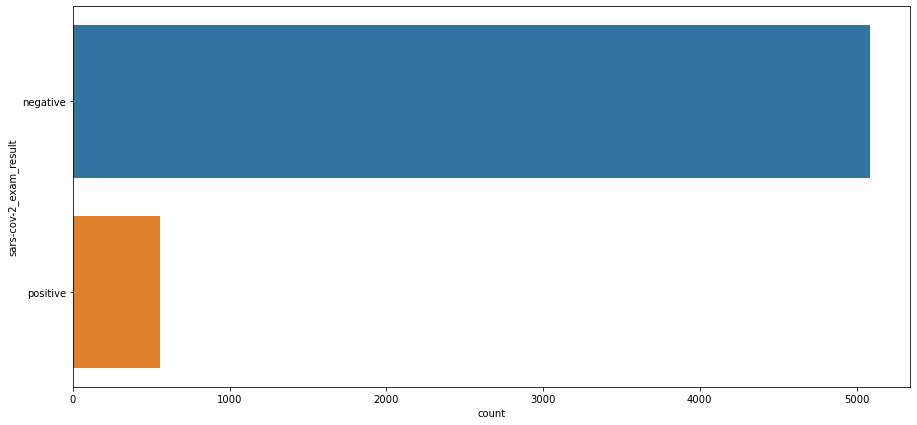

In [21]:
# Analyze the number of cases of COVID that have been reported, both positive and negative.
plt.figure(figsize = (15, 7))
sns.countplot(y = "sars-cov-2_exam_result", data = df, order = df["sars-cov-2_exam_result"].value_counts().index[0:30])

In [22]:
df["sars-cov-2_exam_result"].value_counts()

negative    5086
positive     558
Name: sars-cov-2_exam_result, dtype: int64

<AxesSubplot:xlabel='count', ylabel='patient_addmited_to_regular_ward_(1=yes,_0=no)'>

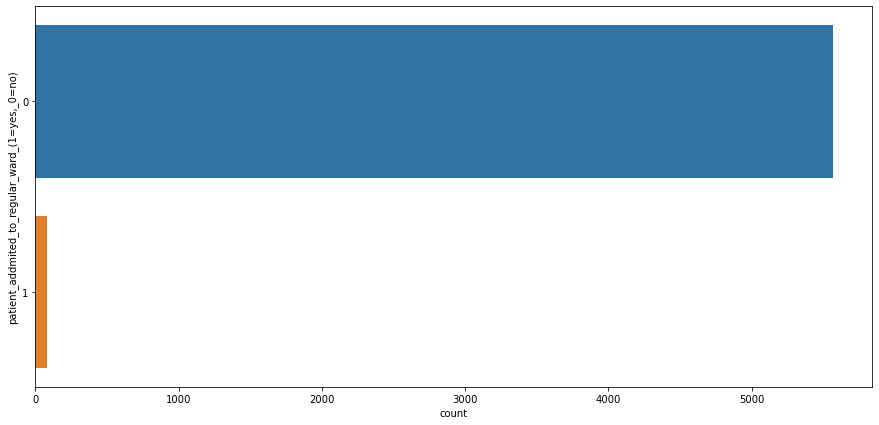

In [23]:
# Analyze how many patient admitted to regular ward. 
plt.figure(figsize = (15, 7))
sns.countplot(y = "patient_addmited_to_regular_ward_(1=yes,_0=no)", data = df, order = df["patient_addmited_to_regular_ward_(1=yes,_0=no)"].value_counts().index[0:30])

In [24]:
df["patient_addmited_to_regular_ward_(1=yes,_0=no)"].value_counts()

0    5565
1      79
Name: patient_addmited_to_regular_ward_(1=yes,_0=no), dtype: int64

### **Check the distribution of the variables**

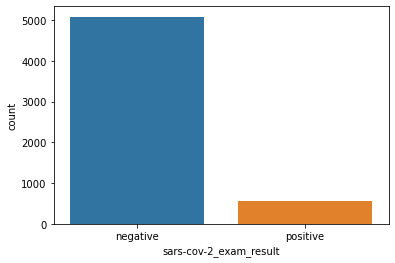

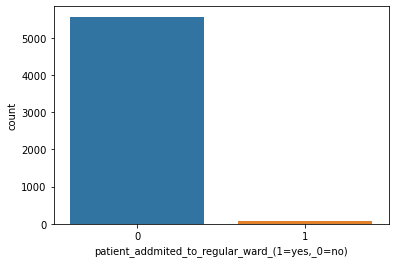

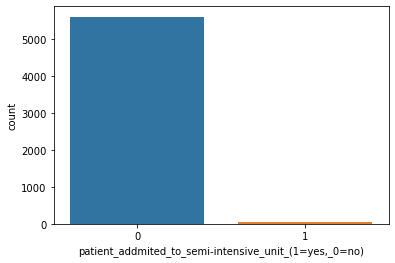

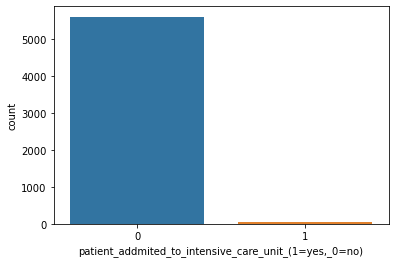

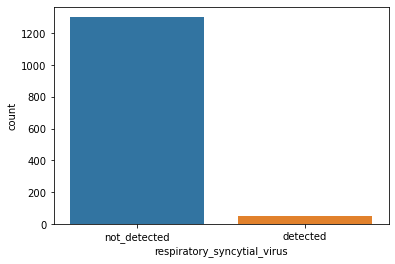

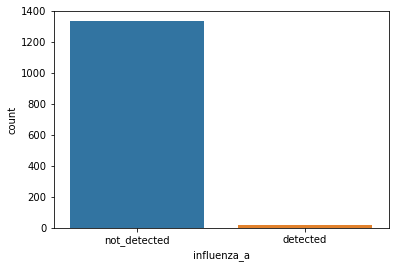

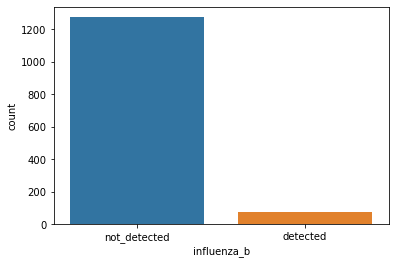

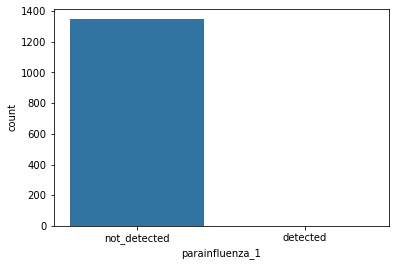

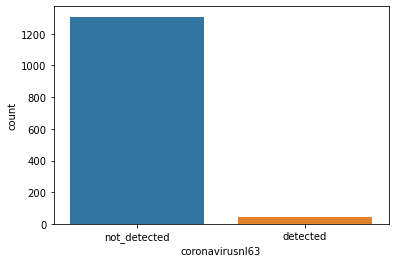

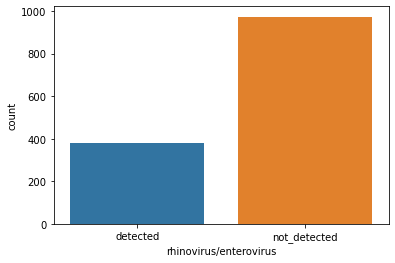

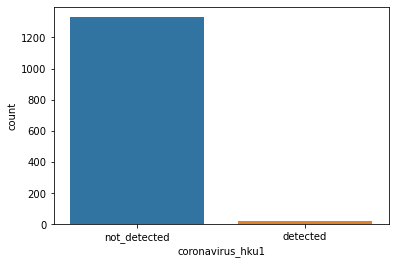

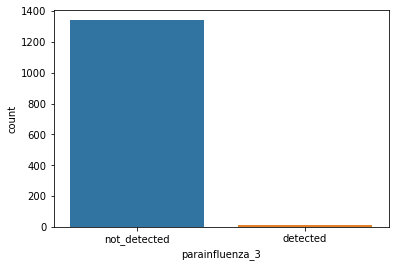

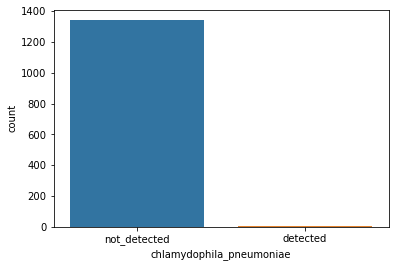

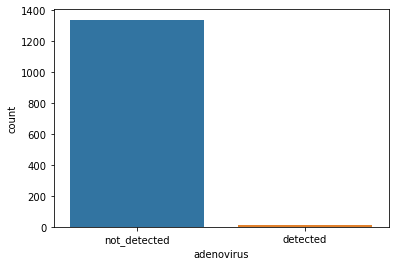

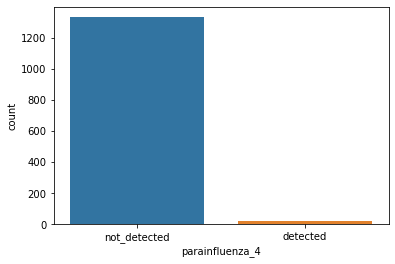

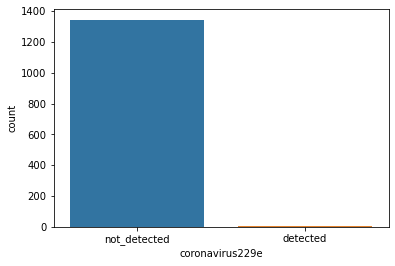

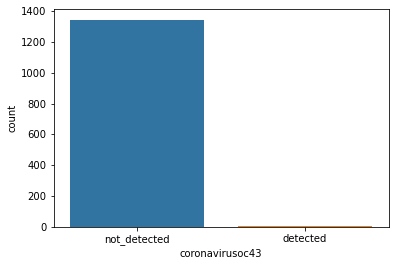

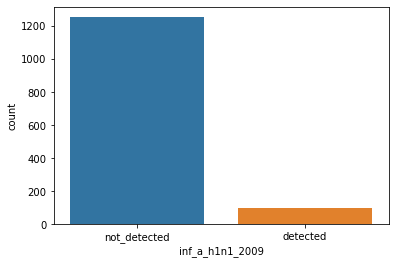

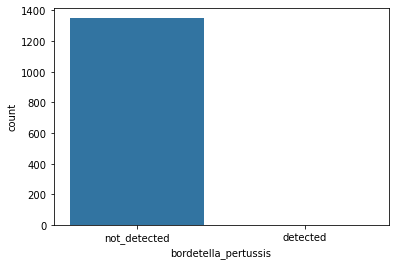

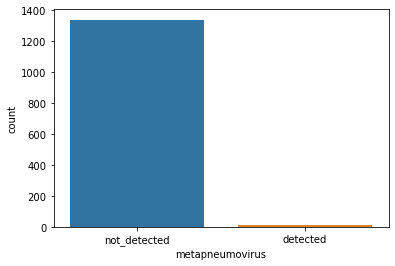

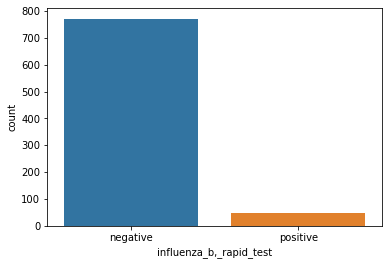

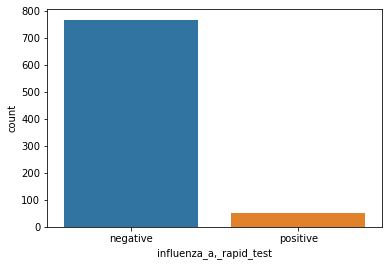

In [25]:
# let's plot all the columns to look at their distributions
for i in df1.columns:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = i)
    plt.show()

* Ratio of positive cases changed by each feature. 
* However, it is almost none in the bordetella and parafiluenza 1. 
* The distribution of rhinoviruses and enteroviruses between the two groups is "relatively" more equal.
* Negative cases dominate significantly for other categories.

### **Bivariate Distributions**

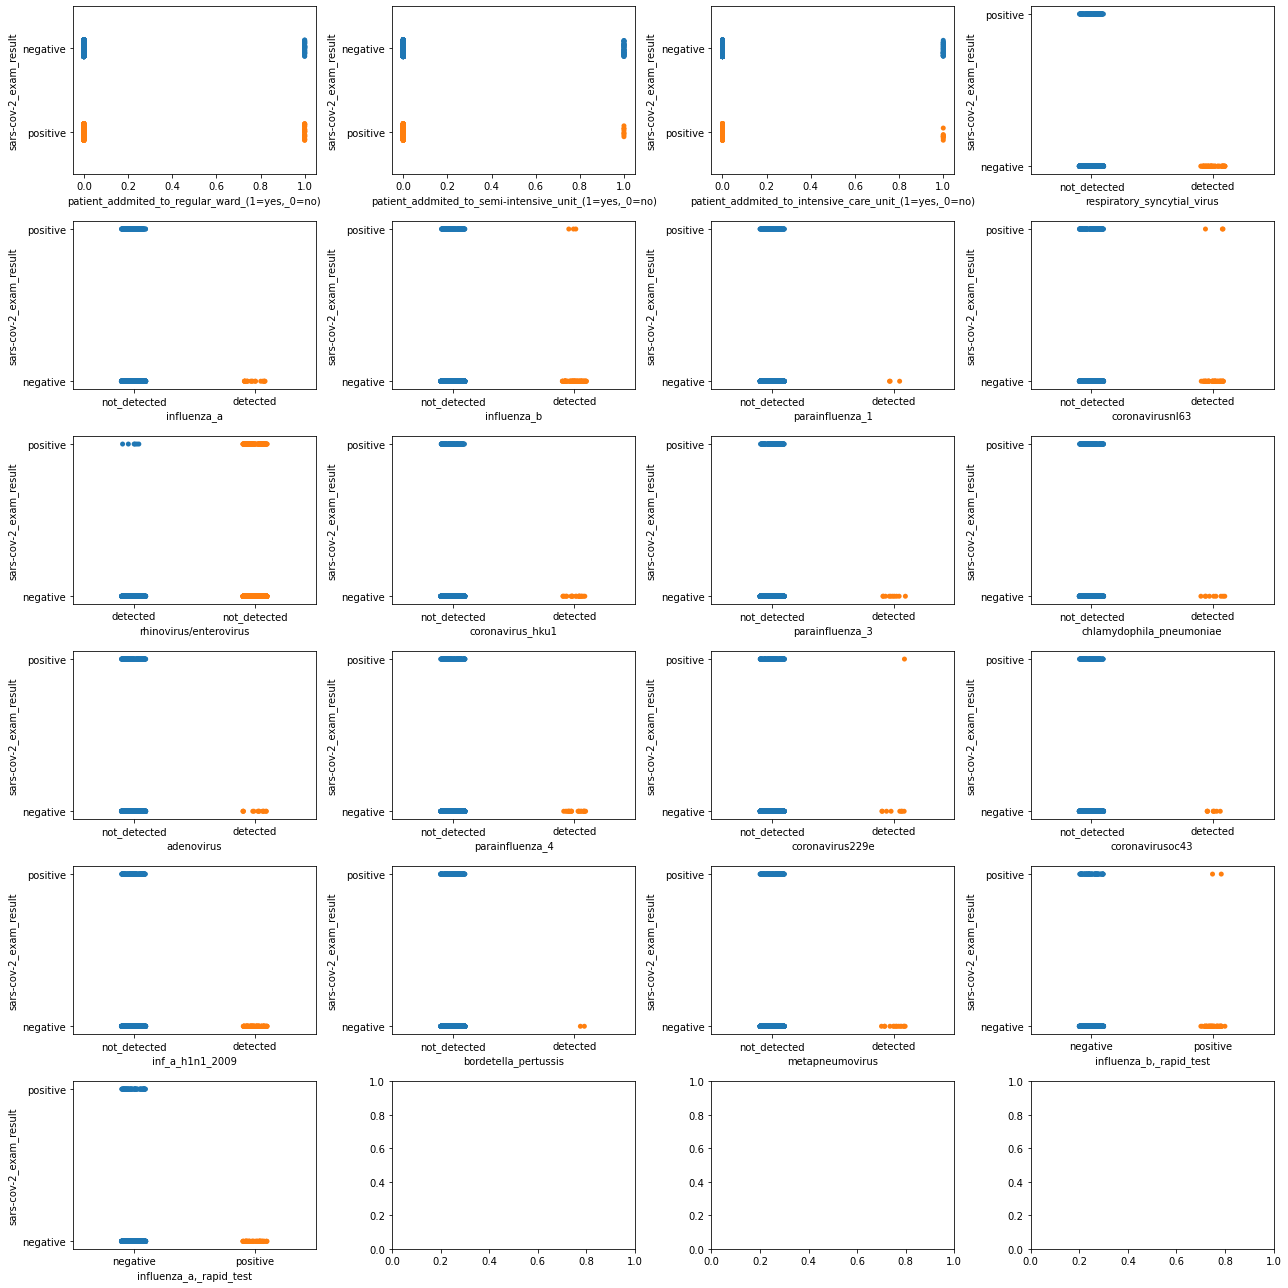

In [26]:
# To observe the relationship between categorical values and the Sars-cov2 result, first create a stripplot.
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(18,18))
row = 0 # Index row
column = 0 # Index col
for f in df1.columns:
    if not f == 'sars-cov-2_exam_result':
        sns.stripplot(x=f, y='sars-cov-2_exam_result', data=df1, ax=axes[row][column])
        column += 1
        if column > 3:
            column = 0
            row += 1
plt.tight_layout()

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 22 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   sars-cov-2_exam_result                                 5644 non-null   object
 1   patient_addmited_to_regular_ward_(1=yes,_0=no)         5644 non-null   int64 
 2   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  5644 non-null   int64 
 3   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  5644 non-null   int64 
 4   respiratory_syncytial_virus                            1354 non-null   object
 5   influenza_a                                            1354 non-null   object
 6   influenza_b                                            1354 non-null   object
 7   parainfluenza_1                                        1352 non-null   object
 8   coronavirusnl63                                        135

This plot gives a great idea of which attributes are associated with positive sars-cov-2_exam_result. As an example,

COVID results were invariably negative when some attributes such as the influenza_a, metapneumovirus, parainfluenza and adenovirus test were positive. These characteristics may serve as excellent indicators of a patient's absence of a COVID positive case.

In [29]:
# Analyze the continuous attributes.
list(set(df.columns) - set(df1.columns))

['lipase_dosage',
 'urine_-_color',
 'urine_-_urobilinogen',
 'pco2_(venous_blood_gas_analysis)',
 'urine_-_bile_pigments',
 'urine_-_hyaline_cylinders',
 'proteina_c_reativa_mg/dl',
 'ionized_calcium\xa0',
 'gamma-glutamyltransferase\xa0',
 'leukocytes',
 'hemoglobin',
 'international_normalized_ratio_(inr)',
 'po2_(venous_blood_gas_analysis)',
 'urine_-_esterase',
 'red_blood_cell_distribution_width_(rdw)',
 'alanine_transaminase',
 'hb_saturation_(arterial_blood_gases)',
 'aspartate_transaminase',
 'basophils',
 'urine_-_nitrite',
 'arterial_lactic_acid',
 'total_co2_(venous_blood_gas_analysis)',
 'strepto_a',
 'direct_bilirubin',
 'urea',
 'arteiral_fio2',
 'ph_(arterial_blood_gas_analysis)',
 'urine_-_protein',
 'eosinophils',
 'hco3_(arterial_blood_gas_analysis)',
 'sodium',
 'po2_(arterial_blood_gas_analysis)',
 'urine_-_yeasts',
 'mean_corpuscular_hemoglobin_(mch)',
 'urine_-_ph',
 'platelets',
 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
 'total_co2_(arterial_blood_

In [30]:
# Now we look at the continious features.
columns=list(set(df.columns) - set(df1.columns))
df2=df[columns]
df2.drop(features_to_be_dropped, axis=1, inplace=True)
df2.head()

lipase_dosage urine_-_color urine_-_urobilinogen  \
0            NaN           NaN                  NaN   
1            NaN           NaN                  NaN   
2            NaN           NaN                  NaN   
3            NaN           NaN                  NaN   
4            NaN           NaN                  NaN   

   pco2_(venous_blood_gas_analysis) urine_-_bile_pigments  \
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   

   proteina_c_reativa_mg/dl  ionized_calcium   gamma-glutamyltransferase   \
0                       NaN               NaN                         NaN   
1                 -0.147895               NaN                         NaN   
2                       NaN               NaN                         NaN   
3                       NaN               NaN                         NaN   
4                       NaN               NaN                         NaN   

   leukocytes  hemoglobin  ...  hco3_(venous_blood_gas_analysis)  magnesium  \
0         NaN         NaN  ...                               NaN        NaN   
1    -0.09461    -0.02234  ...                               NaN        NaN   
2         NaN         NaN  ...                               NaN        NaN   
3         NaN         NaN  ...                               NaN        NaN   
4         NaN         NaN  ...                               NaN        NaN   

  indirect_bilirubin  rods_#  potassium  relationship_(patient/normal)  \
0                NaN     NaN        NaN                            NaN   
1                NaN     NaN  -0.305787                            NaN   
2                NaN     NaN        NaN                            NaN   
3                NaN     NaN        NaN                            NaN   
4                NaN     NaN        NaN                            NaN   

   patient_age_quantile  hb_saturation_(venous_blood_gas_analysis)  \
0                    13                                        NaN   
1                    17                                        NaN   
2                     8                                        NaN   
3                     5                                        NaN   
4                    15                                        NaN   

   creatine_phosphokinase (cpk)   segmented  
0                            NaN        NaN  
1                            NaN        NaN  
2                            NaN        NaN  
3                            NaN        NaN  
4                            NaN        NaN  

[5 rows x 76 columns]

In [31]:
# Basic summary stats - Continuous  Features
df2.describe().T

count          mean       std  \
lipase_dosage                                 8.0 -3.725290e-09  1.069045   
pco2_(venous_blood_gas_analysis)            136.0 -1.935234e-08  1.003697   
proteina_c_reativa_mg/dl                    506.0  2.779703e-09  1.000990   
ionized_calcium                              50.0  1.907349e-08  1.010153   
gamma-glutamyltransferase                   153.0 -1.479159e-09  1.003284   
...                                           ...           ...       ...   
relationship_(patient/normal)                91.0 -9.824941e-10  1.005540   
patient_age_quantile                       5644.0  9.318391e+00  5.777903   
hb_saturation_(venous_blood_gas_analysis)   136.0  1.509290e-08  1.003697   
creatine_phosphokinase (cpk)                104.0 -6.483438e-09  1.004843   
segmented                                    97.0 -2.678753e-08  1.005195   

                                                min       25%       50%  \
lipase_dosage                             -1.192227 -0.547022 -0.350655   
pco2_(venous_blood_gas_analysis)          -2.705014 -0.546619  0.013734   
proteina_c_reativa_mg/dl                  -0.535362 -0.513505 -0.394284   
ionized_calcium                           -2.099957 -0.729337  0.059810   
gamma-glutamyltransferase                 -0.476607 -0.375531 -0.285685   
...                                             ...       ...       ...   
relationship_(patient/normal)             -2.351347 -0.496616 -0.089481   
patient_age_quantile                       0.000000  4.000000  9.000000   
hb_saturation_(venous_blood_gas_analysis) -2.295574 -0.802581  0.090369   
creatine_phosphokinase (cpk)              -0.515714 -0.376967 -0.224750   
segmented                                 -2.264253 -0.672828  0.175932   

                                                 75%        max  
lipase_dosage                               0.182341   1.725222  
pco2_(venous_blood_gas_analysis)            0.619053   5.679521  
proteina_c_reativa_mg/dl                    0.032426   8.026671  
ionized_calcium                             0.558217   3.548662  
gamma-glutamyltransferase                  -0.061072   8.507952  
...                                              ...        ...  
relationship_(patient/normal)               0.453368   4.705678  
patient_age_quantile                       14.000000  19.000000  
hb_saturation_(venous_blood_gas_analysis)   0.817299   1.707877  
creatine_phosphokinase (cpk)                0.035231   7.216365  
segmented                                   0.918597   1.502119  

[64 rows x 8 columns]

In [32]:
# Checking missing values
df2.isnull().sum()

lipase_dosage                                5636
urine_-_color                                5574
urine_-_urobilinogen                         5575
pco2_(venous_blood_gas_analysis)             5508
urine_-_bile_pigments                        5574
                                             ... 
relationship_(patient/normal)                5553
patient_age_quantile                            0
hb_saturation_(venous_blood_gas_analysis)    5508
creatine_phosphokinase (cpk)                 5540
segmented                                    5547
Length: 76, dtype: int64

In [33]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df2 = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df2.sort_values('percent_missing', inplace=True) 
missing_value_df2.head(50)   

column_name  \
patient_age_quantile                                                          patient_age_quantile   
hematocrit                                                                              hematocrit   
hemoglobin                                                                              hemoglobin   
mean_corpuscular_hemoglobin_(mch)                                mean_corpuscular_hemoglobin_(mch)   
eosinophils                                                                            eosinophils   
basophils                                                                                basophils   
red_blood_cell_distribution_width_(rdw)                    red_blood_cell_distribution_width_(rdw)   
mean_corpuscular_volume_(mcv)                                        mean_corpuscular_volume_(mcv)   
red_blood_cells                                                                    red_blood_cells   
platelets                                                                                platelets   
lymphocytes                                                                            lymphocytes   
mean_corpuscular_hemoglobin_concentration (mchc)  mean_corpuscular_hemoglobin_concentration (mchc)   
leukocytes                                                                              leukocytes   
monocytes                                                                                monocytes   
mean_platelet_volume_                                                        mean_platelet_volume_   
neutrophils                                                                            neutrophils   
proteina_c_reativa_mg/dl                                                  proteina_c_reativa_mg/dl   
creatinine                                                                              creatinine   
urea                                                                                          urea   
potassium                                                                                potassium   
sodium                                                                                      sodium   
strepto_a                                                                                strepto_a   
aspartate_transaminase                                                      aspartate_transaminase   
alanine_transaminase                                                          alanine_transaminase   
serum_glucose                                                                        serum_glucose   
direct_bilirubin                                                                  direct_bilirubin   
total_bilirubin                                                                    total_bilirubin   
indirect_bilirubin                                                              indirect_bilirubin   
gamma-glutamyltransferase                                               gamma-glutamyltransferase    
alkaline_phosphatase                                                          alkaline_phosphatase   
base_excess_(venous_blood_gas_analysis)                    base_excess_(venous_blood_gas_analysis)   
hb_saturation_(venous_blood_gas_analysis)                hb_saturation_(venous_blood_gas_analysis)   
pco2_(venous_blood_gas_analysis)                                  pco2_(venous_blood_gas_analysis)   
ph_(venous_blood_gas_analysis)                                      ph_(venous_blood_gas_analysis)   
total_co2_(venous_blood_gas_analysis)                        total_co2_(venous_blood_gas_analysis)   
po2_(venous_blood_gas_analysis)                                    po2_(venous_blood_gas_analysis)   
hco3_(venous_blood_gas_analysis)                                  hco3_(venous_blood_gas_analysis)   
international_normalized_ratio_(inr)                          international_normalized_ratio_(inr)   
creatine_phosphokinase (cpk)                                         creatine_phosphokinase (cpk)    
lactic_

It is clear that there are a number of values missing, ranging from %89 to %100. For the time being, I'll eliminate the numbers that have missing values in excess of 90%. As a result, 15 columns were left.

In [34]:
df2_new = missing_value_df2[missing_value_df2["percent_missing"] >90]
df2_new["column_name"]
list(df2_new.column_name)
df2.drop(list(df2_new.column_name), axis=1, inplace=True)

<AxesSubplot:xlabel='patient_age_quantile', ylabel='Density'>

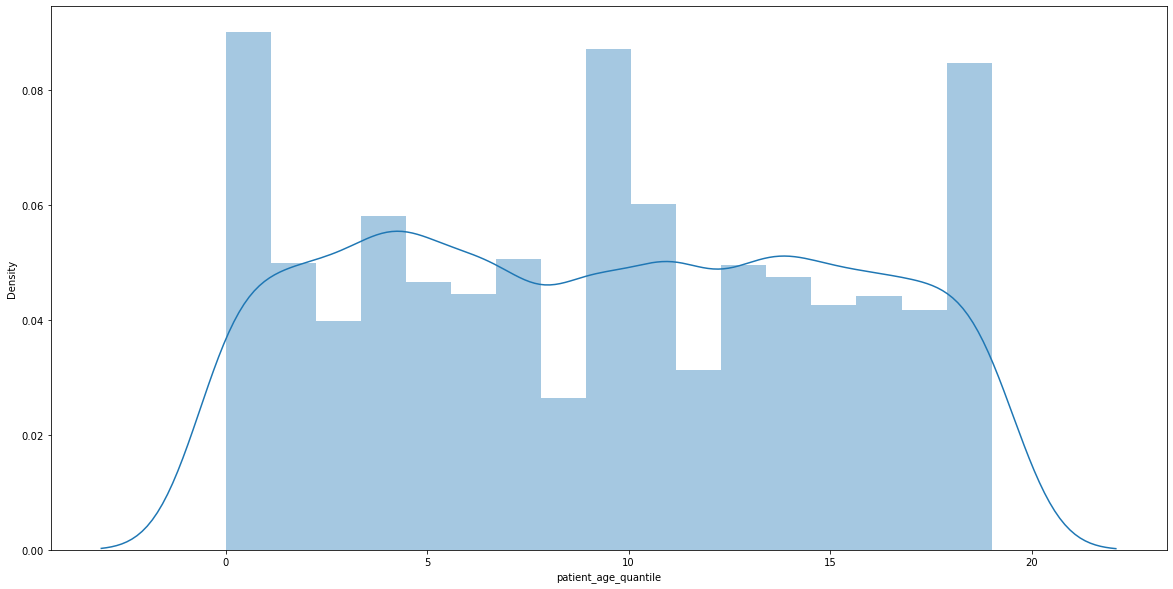

In [35]:
plt.figure(figsize = (20, 10))
sns.distplot(df2["patient_age_quantile"])

In [36]:
trace0 = go.Box(y = df2["patient_age_quantile"],
               boxpoints = "all",
               jitter = 0.3,
               pointpos = -1.5,
               boxmean = "sd")

data = [trace0]
iplot({"data":data})


* In the patient age quantile, the Median is 9 and the mean is 9.31 +/ 5.77. There seem to be no outliers at this point.

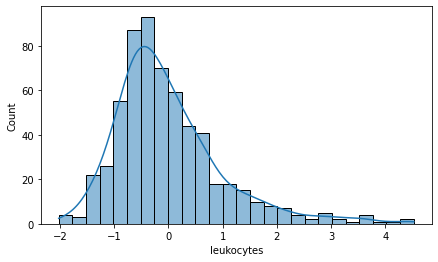

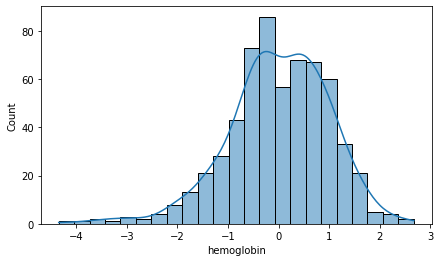

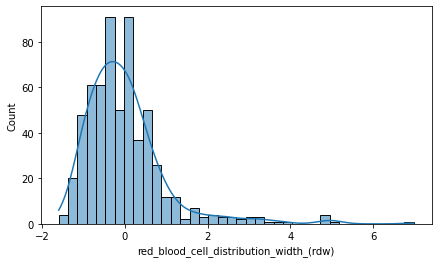

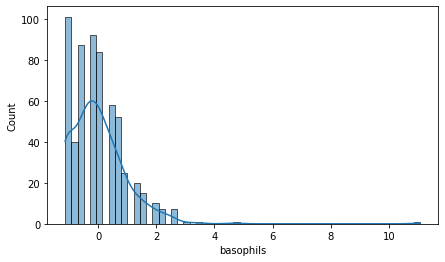

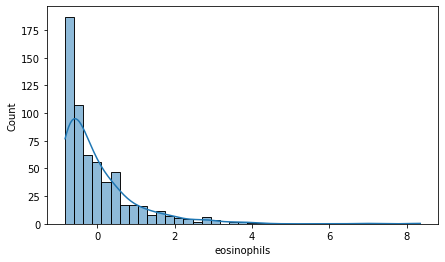

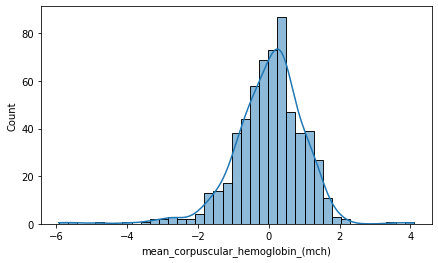

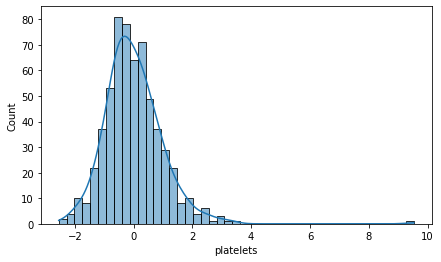

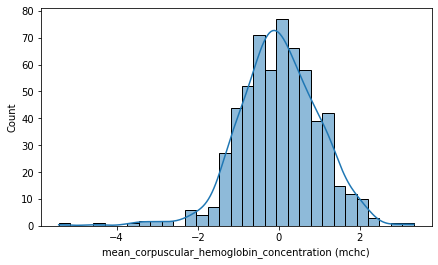

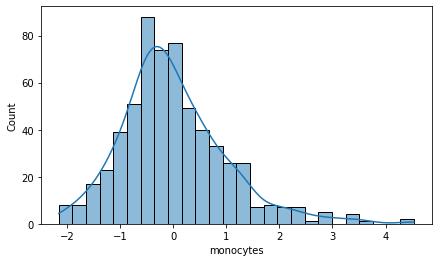

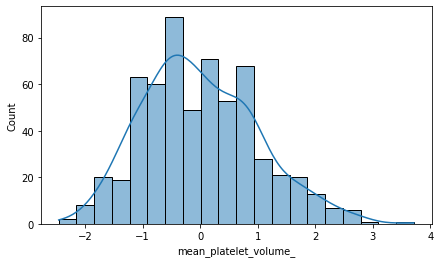

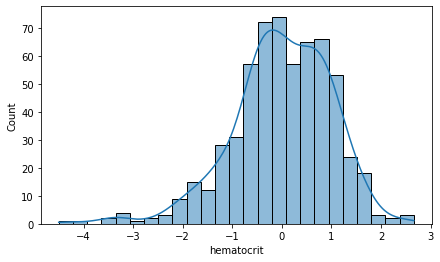

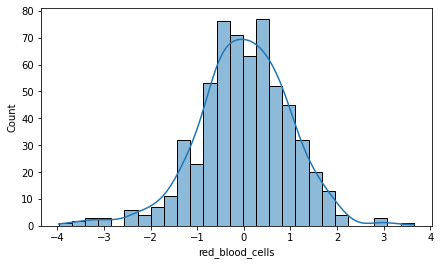

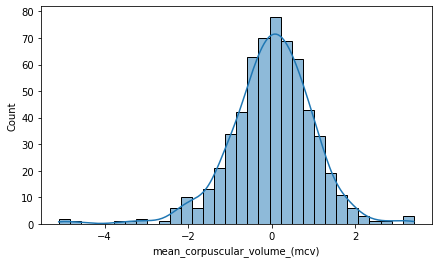

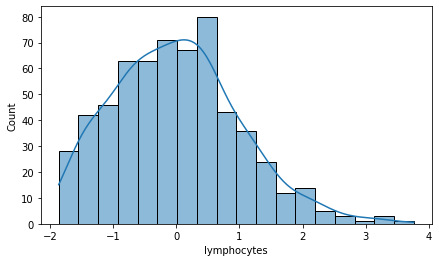

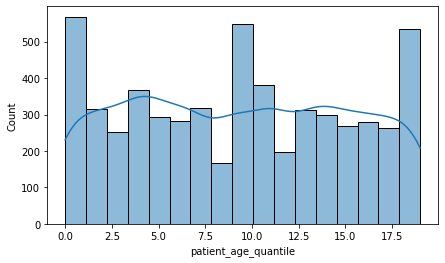

In [37]:
# let's plot all the columns to look at their distributions
for i in df2.columns:
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df2, x = i, kde = True)
    plt.show()

* More of the continuous features are close to normal distribution. However, some of them are right, and some of them are left skewed.
* However, some of them are right, and some of them are left skewed. As an example, lymphocytes is right skewed, and hematocrit is left-skewed

# Outliers Treatment

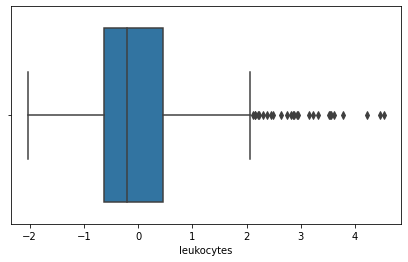

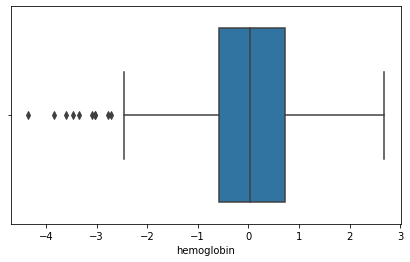

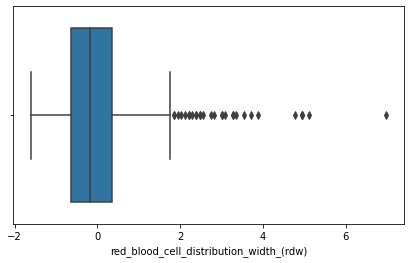

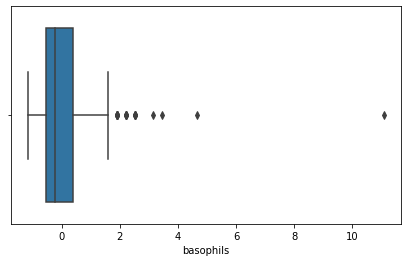

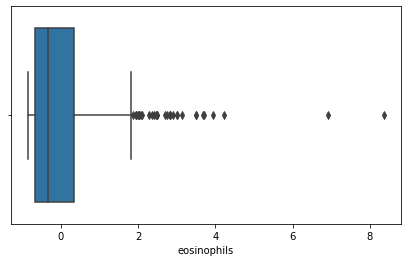

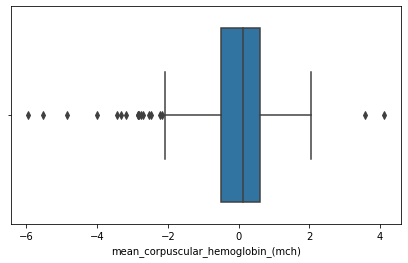

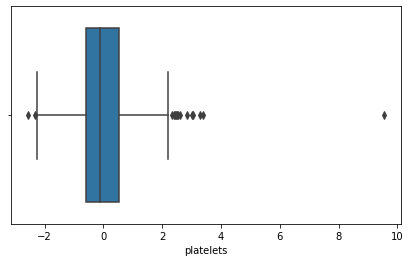

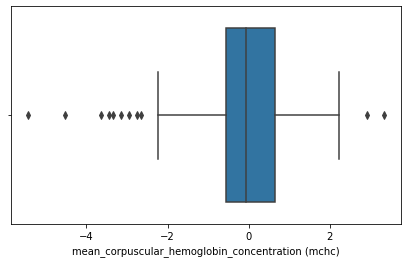

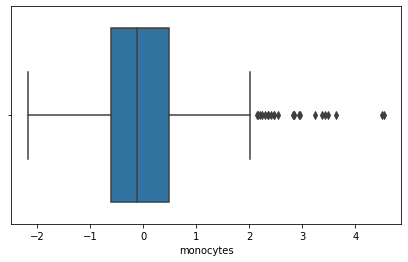

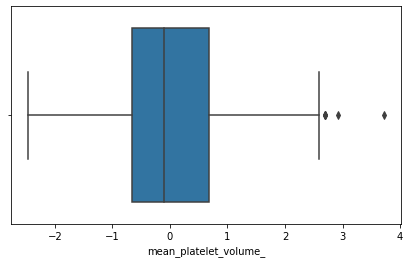

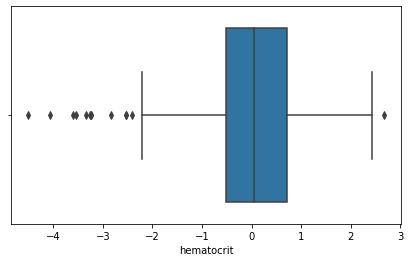

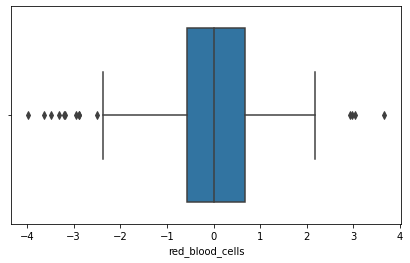

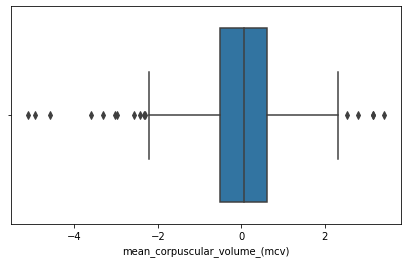

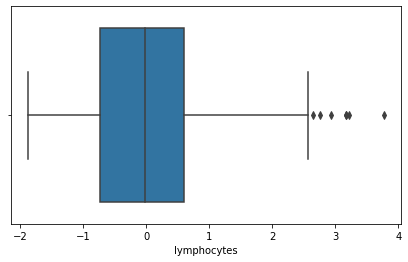

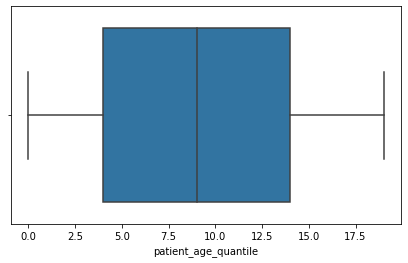

In [38]:
# let's plot all the columns to look at the outliers
for i in df2.columns:
    plt.figure(figsize = (7, 4))
    sns.boxplot(data = df2, x = i)
    plt.show()

As we see there are a few outliers in each numerical features, except for patient age. I decided the remove the data

In [39]:
# remove the data out of 95% confidence level 
def filter_data(df):
    for col in df.columns:
        print("filering the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.025,0.975]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

In [40]:
df2=filter_data(df2)

filering the  leukocytes
filering the  hemoglobin
filering the  red_blood_cell_distribution_width_(rdw)
filering the  basophils
filering the  eosinophils
filering the  mean_corpuscular_hemoglobin_(mch)
filering the  platelets
filering the  mean_corpuscular_hemoglobin_concentration (mchc)
filering the  monocytes
filering the  mean_platelet_volume_
filering the  hematocrit
filering the  red_blood_cells
filering the  mean_corpuscular_volume_(mcv)
filering the  lymphocytes
filering the  patient_age_quantile


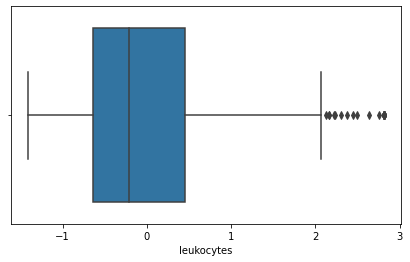

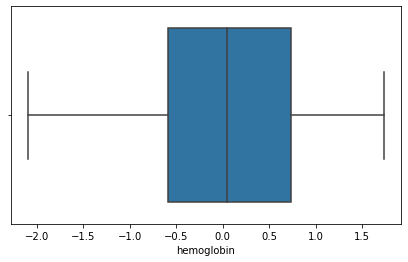

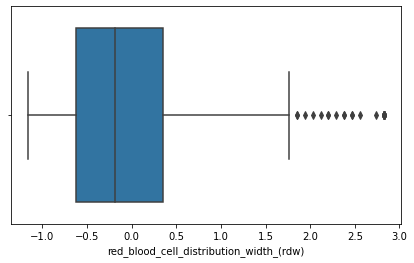

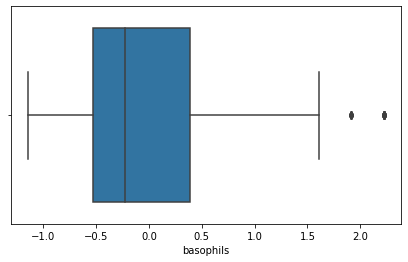

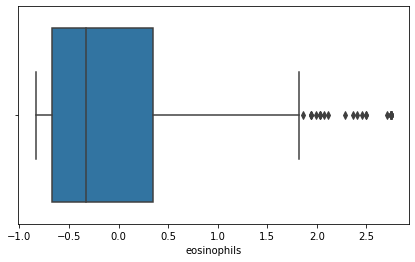

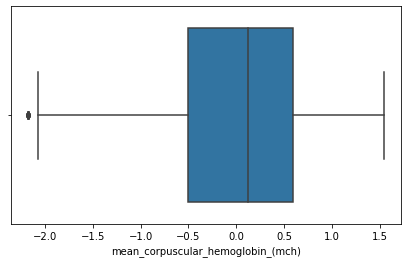

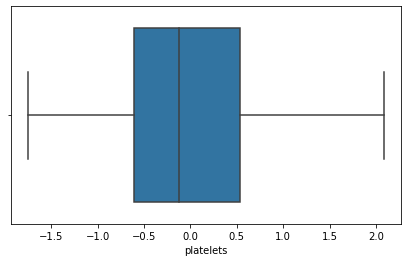

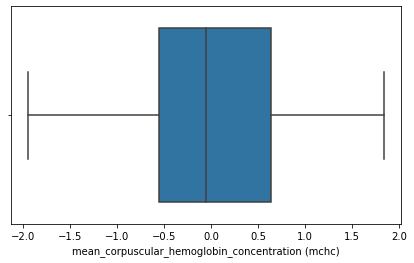

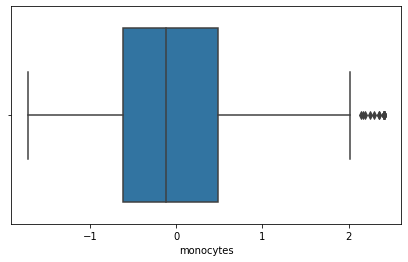

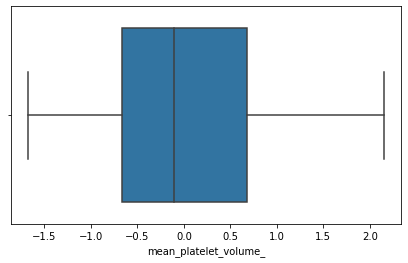

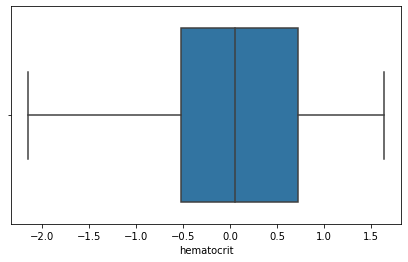

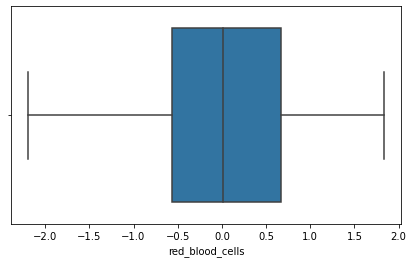

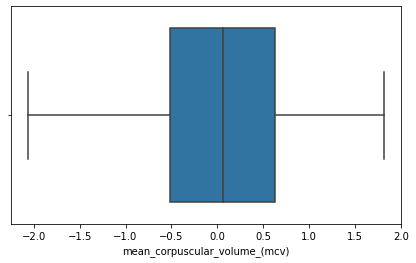

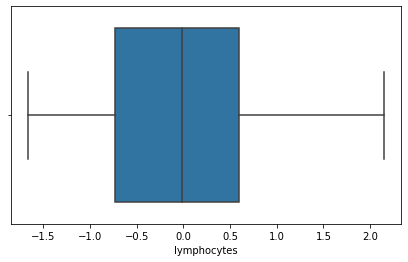

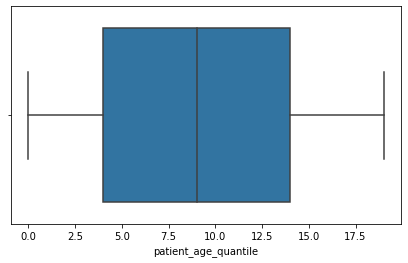

In [41]:
# let's plot all the columns to look at the outliers
for i in df2.columns:
    plt.figure(figsize = (7, 4))
    sns.boxplot(data = df2, x = i)
    plt.show()

Almost no outlier left for each features! 

In [42]:
df2['sars-cov-2_exam_result'] = df['sars-cov-2_exam_result']

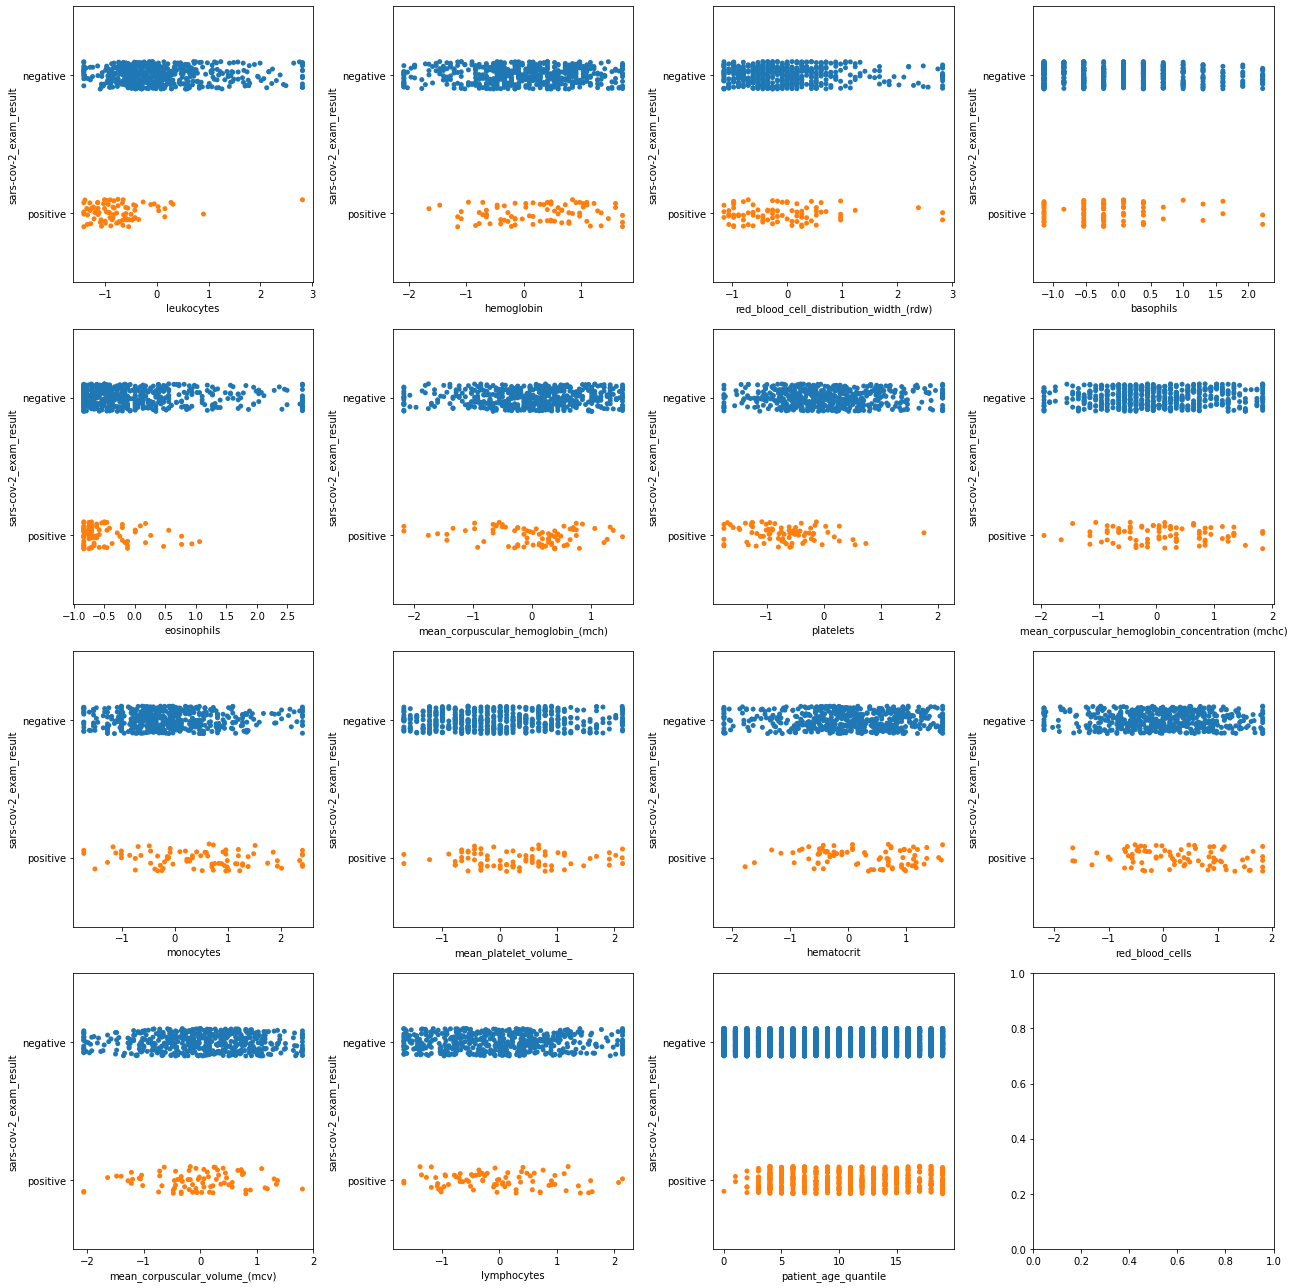

In [43]:
# To observe the relationship between numerical values and the Sars-cov2 result, first create a stripplot.
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,18))
row = 0 # Index row
column = 0 # Index col
for f in df2.columns:
    if not f == 'sars-cov-2_exam_result':
        sns.stripplot(x=f, y='sars-cov-2_exam_result', data=df2, ax=axes[row][column])
        column += 1
        if column > 3:
            column = 0
            row += 1
plt.tight_layout()


* It is hard to see relationship between features and covid positive cases. However, there are some cases associated with positive cases.  
* Negative leukocytes can be associated with more positive covid cases.

### **Correlation between numeric Variables**

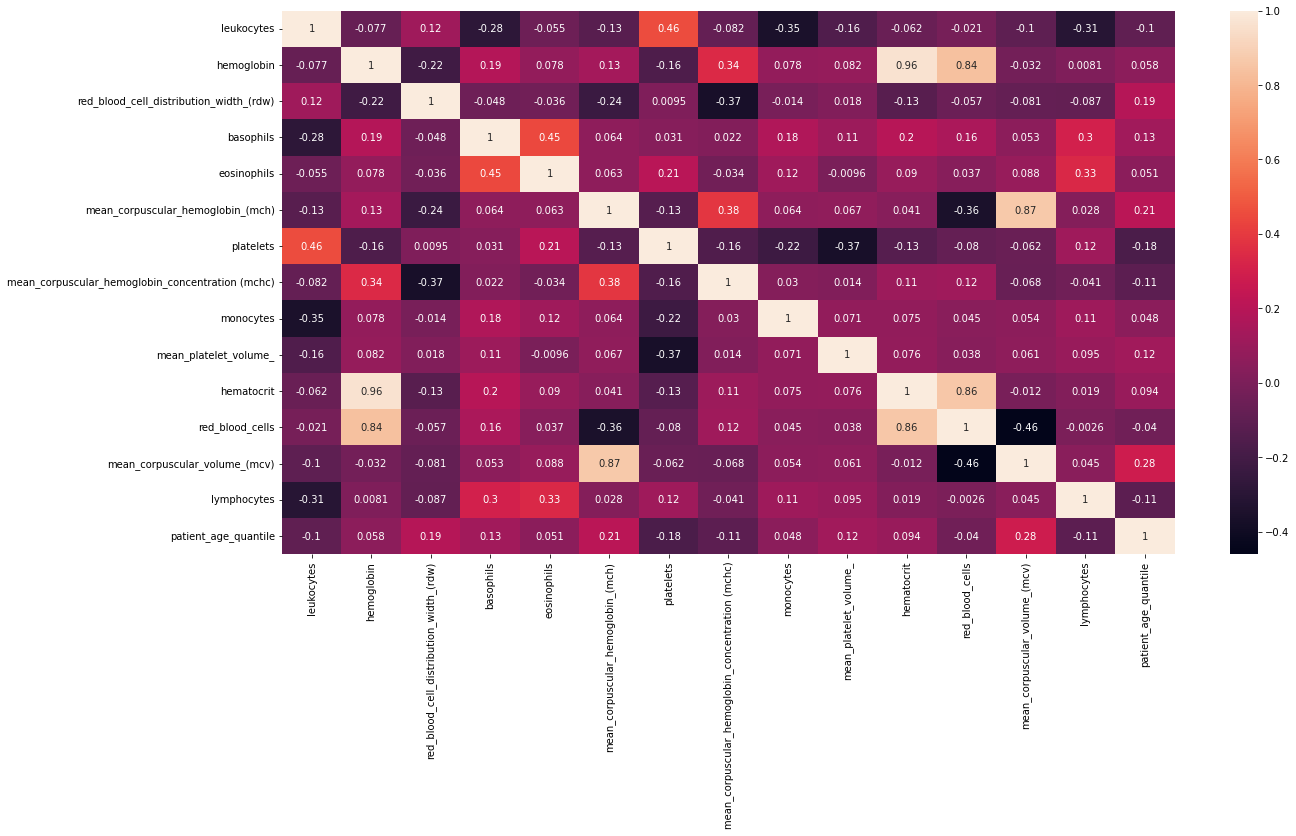

In [44]:
plt.figure(figsize=(20,10))
myBasicCorr = df2.corr('spearman')
sns.heatmap(myBasicCorr, annot = True)
plt.show()

I assumed that abs values higher than 0.80 are highly correlated. For example,

Red blood cells and haemoglobin have a positive correlation of 0.86. Haemoglobin, a protein rich in iron that gives blood its red color, is found in red blood cells. Red blood cells use haemoglobin to transport oxygen from the lungs to every part of the body and carbon dioxide from other regions of the body to the lungs for exhalation.

Hematocrit and haemoglobin have a positive correlation of 0.96. Red blood cell measures like haemoglobin and hematocrit identify dietary deficits, acute diseases, and long-term medical disorders. Red blood cells (RBCs) contain the protein haemoglobin, and hematocrit measures the proportion of blood volume made up of RBCs.

`Not`: I shall be careful about the collinearity in statistics. When predictor variables in the same regression model are highly-correlated, they cannot independently predict the value of the dependent variable.

Abs values higher than 0.85 must be taken into account for collinearity. I want to do necessary analysis after imputing. By doing this, we will see final form of data to be trained! 

#### ** hemoglobin and hematocrit and red_blood_cells
#### ** mean_corpuscular_volume_(mcv) and mean_corpuscular_hemoglobin_(mch)

### **Bivariate Distributions for continuous attributes**

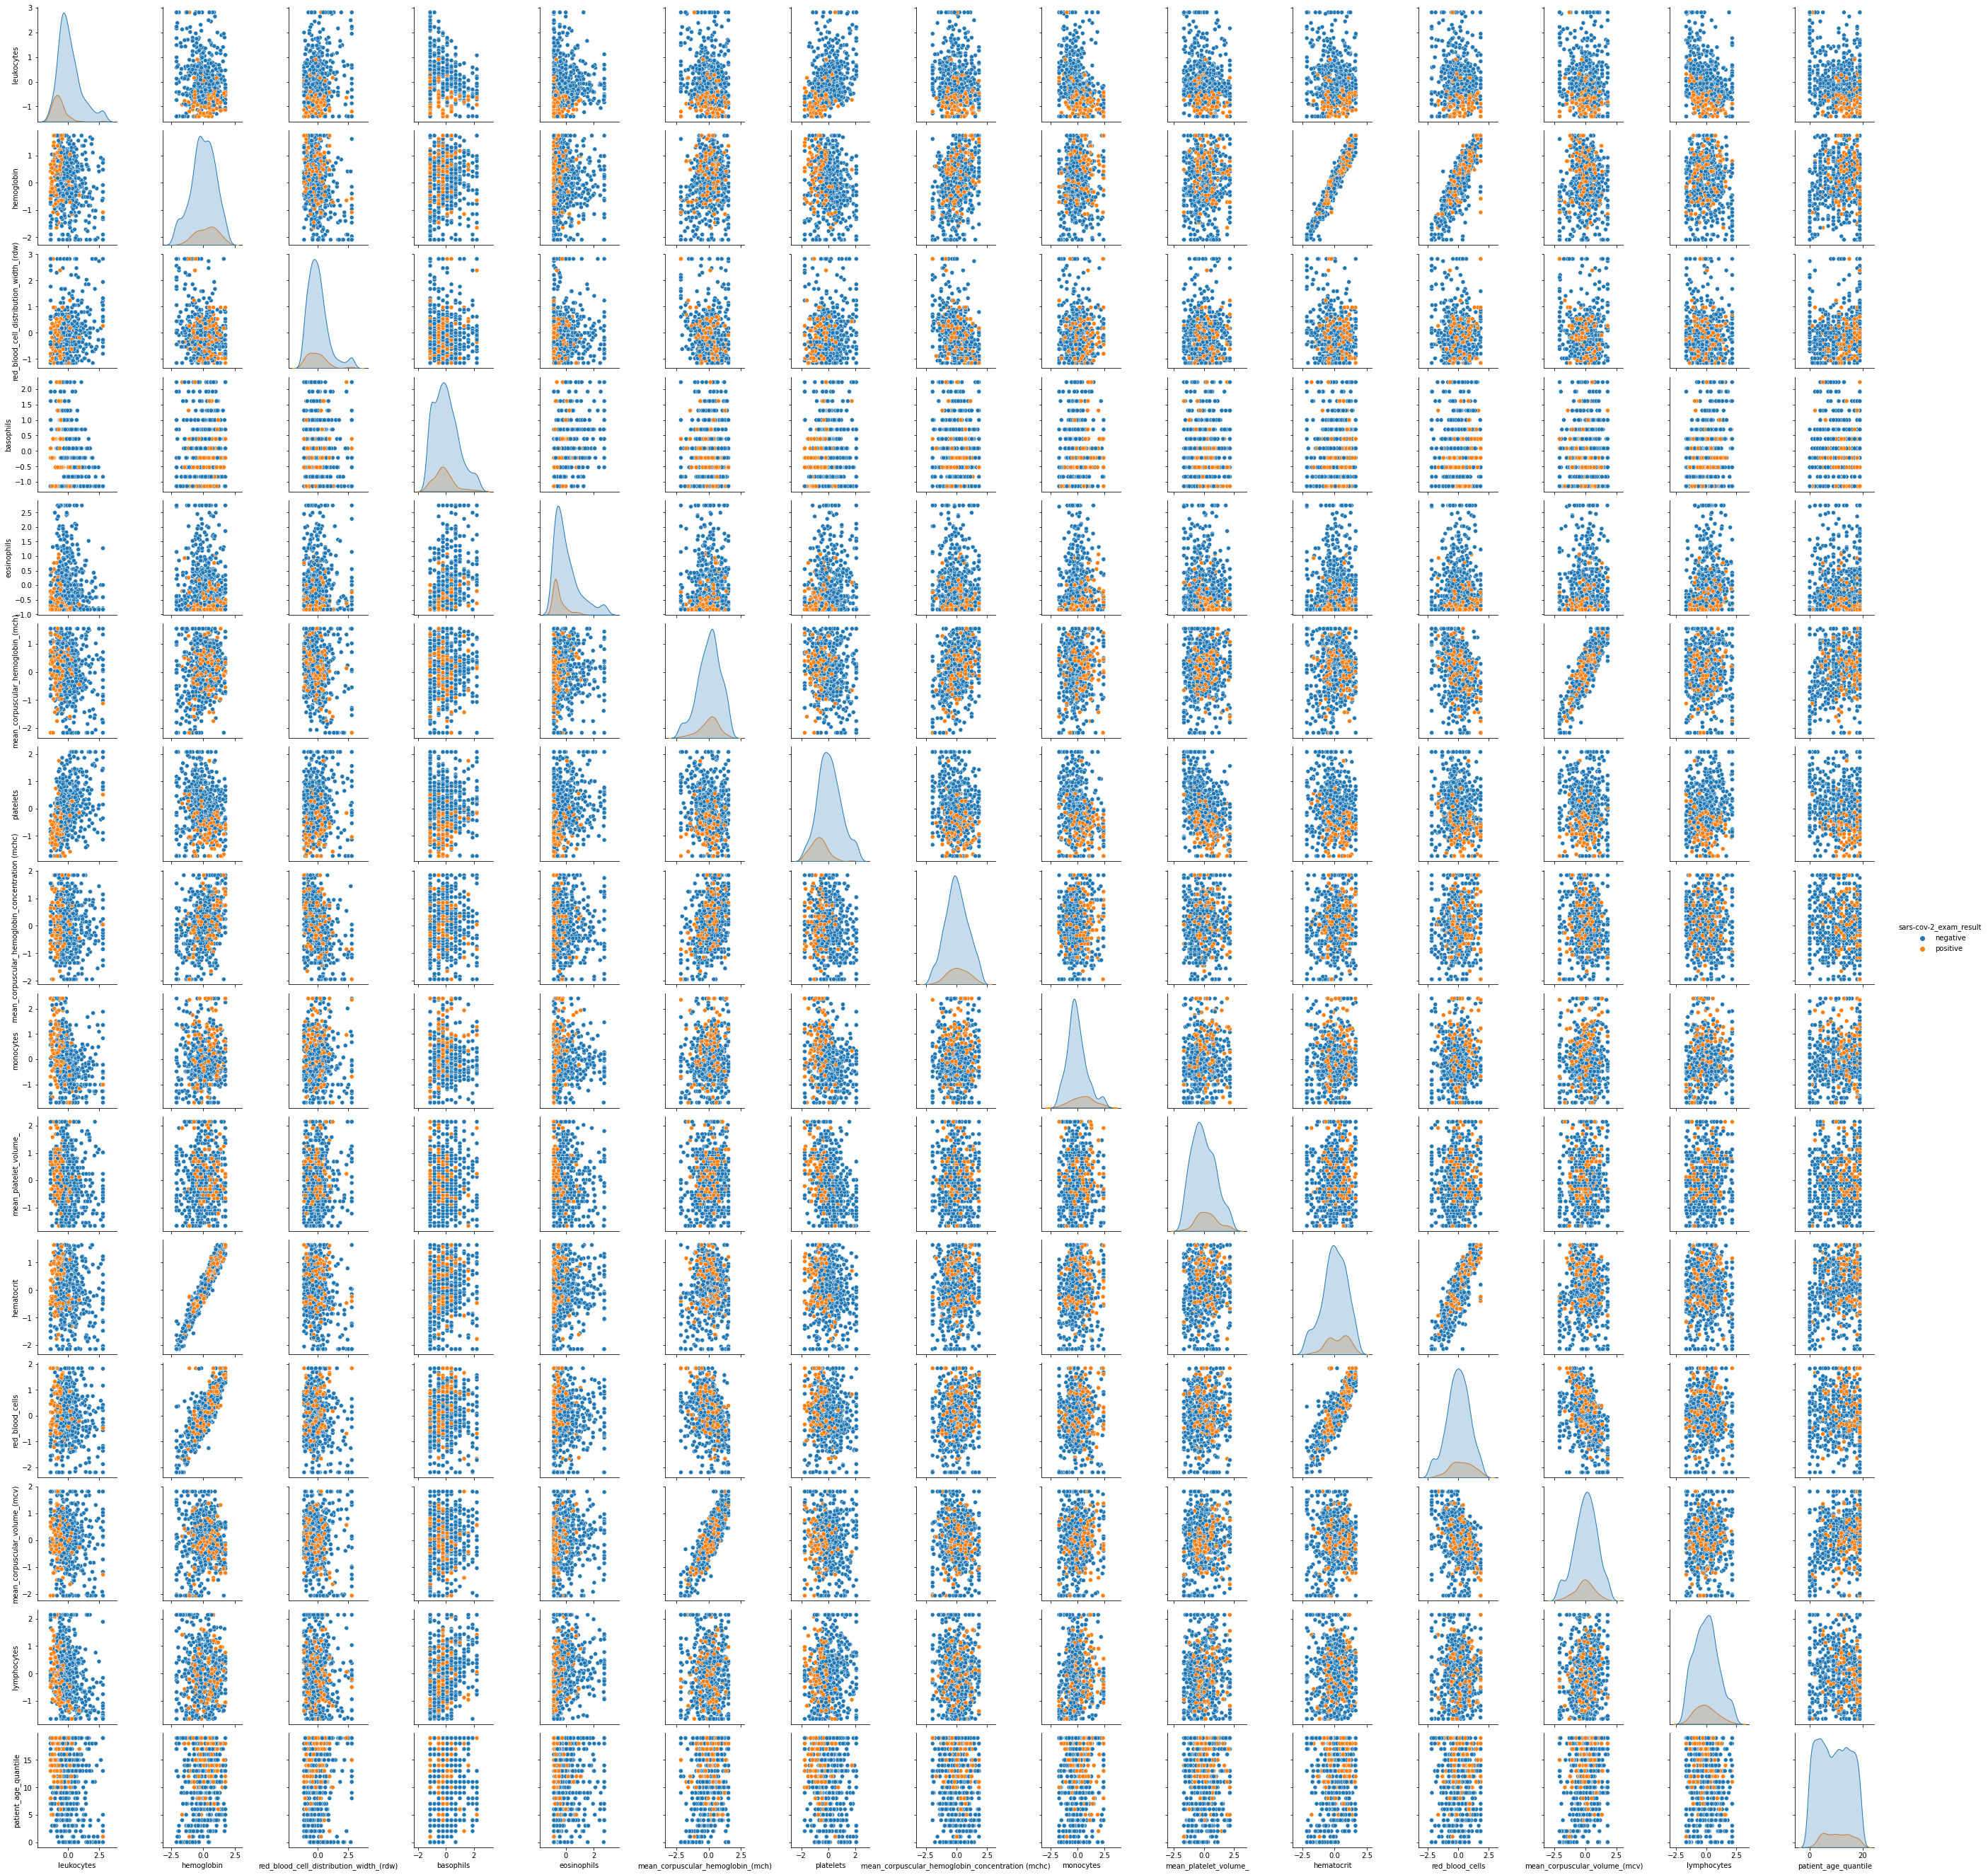

In [45]:
sns.pairplot(df2, hue='sars-cov-2_exam_result')


<AxesSubplot:xlabel='hemoglobin', ylabel='hematocrit'>

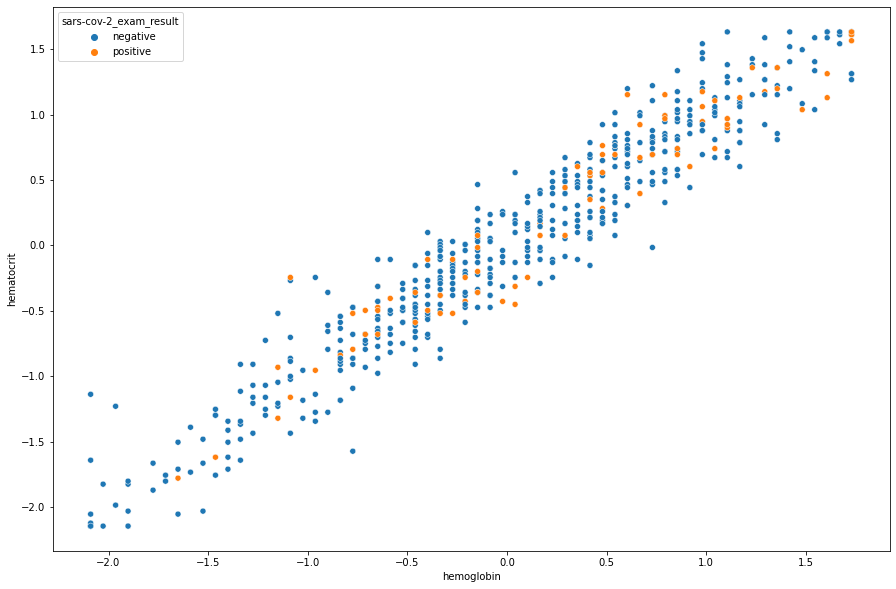

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2,x="hemoglobin",y="hematocrit",hue="sars-cov-2_exam_result")

<AxesSubplot:xlabel='lymphocytes', ylabel='hematocrit'>

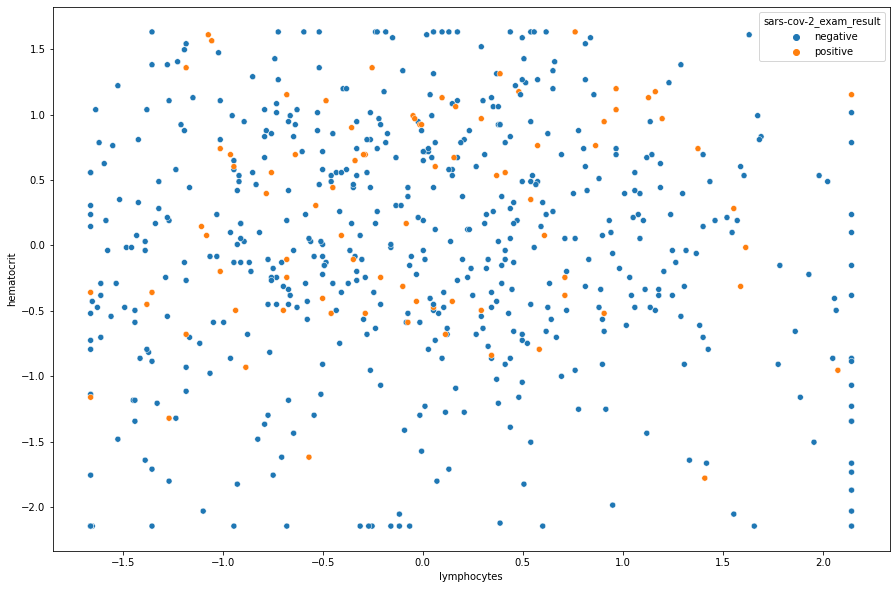

In [47]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x="lymphocytes",y="hematocrit",hue="sars-cov-2_exam_result")

<AxesSubplot:xlabel='leukocytes', ylabel='basophils'>

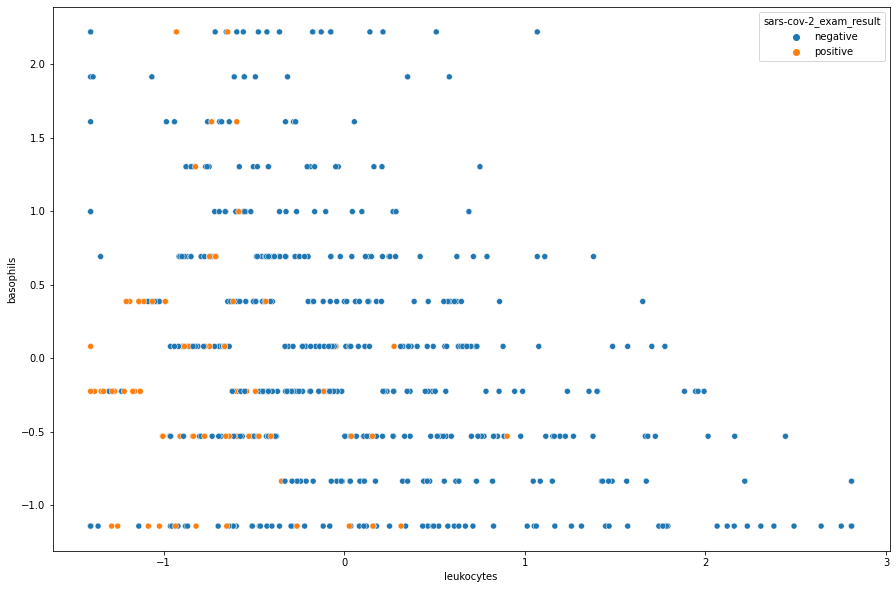

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df2, x="leukocytes",y="basophils",hue="sars-cov-2_exam_result")

High correlations in the last plot are also evident in this Figure. To show how these points connect to the positive and negative COVID cases, I wanted to highlight them in this Figure. 

Hematocrit and haemoglobin are two features where positive covid instances exist in their positive values. These features may signal positive COVID scenarios when we have greater values for them.

Some examples can be given in the variables that are not correlated with each other. For example, basophils and leukocytes are not well correlated, but positive covid cases exist more in the negative leukocytes values. 


### **Imputation and Feature Engineering**

In [49]:
df2_new = df2.drop('sars-cov-2_exam_result', axis=1, inplace=True)

In [50]:
# assign original dataframe into a new dataframes.
df1_new = df1
df2_new = df2

In [51]:
# Checking missing values again for categorical data
df1_new.isnull().sum()

sars-cov-2_exam_result                                      0
patient_addmited_to_regular_ward_(1=yes,_0=no)              0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)       0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)       0
respiratory_syncytial_virus                              4290
influenza_a                                              4290
influenza_b                                              4290
parainfluenza_1                                          4292
coronavirusnl63                                          4292
rhinovirus/enterovirus                                   4292
coronavirus_hku1                                         4292
parainfluenza_3                                          4292
chlamydophila_pneumoniae                                 4292
adenovirus                                               4292
parainfluenza_4                                          4292
coronavirus229e                                          4292
coronavi

In [52]:
df1_new.shape

(5644, 22)

In [53]:
# We first need to look at the categorical attributes.
categ1 = []
# Loop to evaluate if it's categorical
for j in df1_new.columns:
        categ1.append(j)
print(categ1)
len(categ1)

['sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test']


22

In [54]:
# columns with missing values
categ_missing1 = categ1[4:22]
print(categ_missing1)

['respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test']


In [55]:
# Changing string values to numerical values
for j in categ1:
    if 'positive' in list(df1_new[j].unique()):
        df1[j].replace('positive',1, inplace=True)
    elif 'detected' in list(df1_new[j].unique()):
        df1[j].replace('detected',1, inplace=True)
    if 'negative' in list(df1_new[j].unique()):
        df1[j].replace('negative',0, inplace=True) 
    elif 'not_detected' in list(df1_new[j].unique()):
        df1[j].replace('not_detected',0, inplace=True)

In [56]:
# Eval categories for all discrete features
for i in categ1:
    print(i, ' - ', df1_new[i].unique())

sars-cov-2_exam_result  -  [0 1]
patient_addmited_to_regular_ward_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  -  [0 1]
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  -  [0 1]
respiratory_syncytial_virus  -  [nan  0.  1.]
influenza_a  -  [nan  0.  1.]
influenza_b  -  [nan  0.  1.]
parainfluenza_1  -  [nan  0.  1.]
coronavirusnl63  -  [nan  0.  1.]
rhinovirus/enterovirus  -  [nan  1.  0.]
coronavirus_hku1  -  [nan  0.  1.]
parainfluenza_3  -  [nan  0.  1.]
chlamydophila_pneumoniae  -  [nan  0.  1.]
adenovirus  -  [nan  0.  1.]
parainfluenza_4  -  [nan  0.  1.]
coronavirus229e  -  [nan  0.  1.]
coronavirusoc43  -  [nan  0.  1.]
inf_a_h1n1_2009  -  [nan  0.  1.]
bordetella_pertussis  -  [nan  0.  1.]
metapneumovirus  -  [nan  0.  1.]
influenza_b,_rapid_test  -  [nan  0.  1.]
influenza_a,_rapid_test  -  [nan  0.  1.]


In [57]:
# Checking missing values again for categorical data
df2_new.isnull().sum()

leukocytes                                          5042
hemoglobin                                          5041
red_blood_cell_distribution_width_(rdw)             5042
basophils                                           5042
eosinophils                                         5042
mean_corpuscular_hemoglobin_(mch)                   5042
platelets                                           5042
mean_corpuscular_hemoglobin_concentration (mchc)    5042
monocytes                                           5043
mean_platelet_volume_                               5045
hematocrit                                          5041
red_blood_cells                                     5042
mean_corpuscular_volume_(mcv)                       5042
lymphocytes                                         5042
patient_age_quantile                                   0
dtype: int64

In [58]:
# We first need to look at the categorical attributes.
categ2 = []
# Loop to evaluate if it's categorical
for j in df2_new.columns:
        categ2.append(j)
print(categ2)
len(categ2)

['leukocytes', 'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'basophils', 'eosinophils', 'mean_corpuscular_hemoglobin_(mch)', 'platelets', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'monocytes', 'mean_platelet_volume_', 'hematocrit', 'red_blood_cells', 'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile']


15

In [59]:
# pylint: disable=missing-final-newline
categ_missing2 = categ2[0:3] +categ2[4::]
print(categ_missing2)

['leukocytes', 'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'eosinophils', 'mean_corpuscular_hemoglobin_(mch)', 'platelets', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'monocytes', 'mean_platelet_volume_', 'hematocrit', 'red_blood_cells', 'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile']


In [60]:
# Eval categories for all numerical features
for i in categ2:
    print(i, ' - ', df2_new[i].unique())

leukocytes  -  [            nan -9.46103483e-02  3.64550471e-01 -8.84923160e-01
 -2.11487651e-01 -1.13259172e+00 -7.51307607e-02  1.05750747e-01
 -2.86623031e-01 -5.45422614e-01  4.61877153e-06  7.26313293e-01
 -2.22576950e-02 -1.78094044e-01 -8.34791958e-02  1.33578509e-01
  5.56563020e-01  1.19660521e+00  1.22443306e+00  2.25410879e-01
  3.50636482e-01 -6.53951466e-01 -5.09246290e-01  1.66689694e+00
 -6.81779325e-01 -7.48566449e-01 -5.89947224e-01  2.36542031e-01
 -1.03241122e+00 -1.13815737e+00  1.15208066e+00 -5.95512807e-01
 -4.28545356e-01 -4.31328207e-01 -6.59517050e-01  8.35292041e-03
 -1.02406275e+00  1.70307338e+00  8.34884346e-02 -4.17372882e-02
 -4.03500170e-01  3.06152366e-02  1.56393373e+00 -8.06963369e-02
 -5.50988197e-01 -1.11265387e-02 -4.89766836e-01 -1.66921169e-02
 -9.60058570e-01 -1.40495754e+00 -7.17955649e-01  2.80916362e+00
 -3.17233652e-01 -2.53229409e-01 -9.62841392e-01 -1.72528461e-01
 -4.95332420e-01 -1.92008048e-01 -6.31689131e-01 -6.92910492e-01
 -5.649021

In [61]:
# Combine the two datasets
df_all = pd.concat([df1_new, df2_new], axis=1)

In [62]:
df_all.shape

(5644, 37)

In [63]:
df_all.head()

sars-cov-2_exam_result  patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0                       0                                               0   
1                       0                                               0   
2                       0                                               0   
3                       0                                               0   
4                       0                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   respiratory_syncytial_virus  influenza_a  influenza_b  parainfluenza_1  \
0                          NaN          NaN          NaN              NaN   
1                          0.0          0.0          0.0              0.0   
2                          NaN          NaN          NaN              NaN   
3                          NaN          NaN          NaN              NaN   
4                          0.0          0.0          0.0              0.0   

   coronavirusnl63  rhinovirus/enterovirus  ...  \
0              NaN                     NaN  ...   
1              0.0                     1.0  ...   
2              NaN                     NaN  ...   
3              NaN                     NaN  ...   
4              0.0                     1.0  ...   

   mean_corpuscular_hemoglobin_(mch)  platelets  \
0                                NaN        NaN   
1                          -0.292269  -0.517413   
2                                NaN        NaN   
3                                NaN        NaN   
4                                NaN        NaN   

   mean_corpuscular_hemoglobin_concentration (mchc)  monocytes  \
0                                               NaN        NaN   
1                                          -0.95079   0.357547   
2                                               NaN        NaN   
3                                               NaN        NaN   
4                                               NaN        NaN   

   mean_platelet_volume_  hematocrit  red_blood_cells  \
0                    NaN         NaN              NaN   
1               0.010677    0.236515         0.102004   
2                    NaN         NaN              NaN   
3                    NaN         NaN              NaN   
4                    NaN         NaN              NaN   

   mean_corpuscular_volume_(mcv)  lymphocytes  patient_age_quantile  
0                            NaN          NaN                    13  
1                       0.166192     0.318366                    17  
2                            NaN          NaN                     8  
3                            NaN          NaN                     5  
4                            NaN          NaN                    15  

[5 rows x 37 columns]

In [64]:
# combine the missing values columns
categ_missing = categ_missing1 + categ_missing2
print(categ_missing)

['respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test', 'leukocytes', 'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'eosinophils', 'mean_corpuscular_hemoglobin_(mch)', 'platelets', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'monocytes', 'mean_platelet_volume_', 'hematocrit', 'red_blood_cells', 'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile']


In [65]:
len(categ_missing)

32

### 32 columns have missing values.

In [66]:
categ = []
# Loop to evaluate if it's categorical
for j in df_all.columns:
        categ.append(j)
print(categ)
len(categ)

['sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test', 'leukocytes', 'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'basophils', 'eosinophils', 'mean_corpuscular_hemoglobin_(mch)', 'platelets', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'monocytes', 'mean_platelet_volume_', 'hematocrit', 'red_blood_cells', 'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile']


37

### we have 37 columns in total, and 5 of them has no missing values.

* In order to increase the accuracy of the model, I decided to perform model  on the rows with fewer than 40% missing values. Following a literature study, I arrived at this conclusion.

In [67]:
sixty_missing_level = int((len(df_all.columns))/1.6)
df_all['count'] = df_all.apply(lambda x: x.count(), axis=1)
df_all=df_all[df_all['count']>sixty_missing_level ]
df_all=df_all.drop(['count'], axis=1)
df_all = df_all.reset_index(drop=True)

In [68]:
sixty_missing_level

23

If there are missing values in 23 or more columns, those rows have been eliminated.

In [69]:
df_all.shape

(366, 37)

we have fewer rows, but will give us more robust model! 

In [70]:
df_all.tail()

sars-cov-2_exam_result  patient_addmited_to_regular_ward_(1=yes,_0=no)  \
361                       1                                               0   
362                       0                                               0   
363                       0                                               0   
364                       0                                               0   
365                       0                                               0   

     patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
361                                                  0       
362                                                  0       
363                                                  0       
364                                                  0       
365                                                  0       

     patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
361                                                  0       
362                                                  0       
363                                                  0       
364                                                  0       
365                                                  0       

     respiratory_syncytial_virus  influenza_a  influenza_b  parainfluenza_1  \
361                          0.0          0.0          0.0              0.0   
362                          0.0          0.0          0.0              0.0   
363                          0.0          0.0          0.0              0.0   
364                          0.0          0.0          0.0              0.0   
365                          0.0          0.0          0.0              0.0   

     coronavirusnl63  rhinovirus/enterovirus  ...  \
361              0.0                     0.0  ...   
362              0.0                     0.0  ...   
363              0.0                     0.0  ...   
364              0.0                     0.0  ...   
365              0.0                     0.0  ...   

     mean_corpuscular_hemoglobin_(mch)  platelets  \
361                           1.537236  -1.747842   
362                          -0.449085  -0.102873   
363                          -2.171434   0.663397   
364                           0.700891  -0.492289   
365                           1.537236  -1.747842   

     mean_corpuscular_hemoglobin_concentration (mchc)  monocytes  \
361                                          0.841616   1.197969   
362                                         -0.054585   1.066653   
363                                         -1.050367   1.670707   
364                                          1.538664   0.909074   
365                                          1.538664   1.381812   

     mean_platelet_volume_  hematocrit  red_blood_cells  \
361               1.132609    1.197836         0.384090   
362               0.908221    0.190738         0.384090   
363              -0.774677   -0.289922         0.754327   
364              -0.213711    0.717175         0.613284   
365              -0.550290   -2.143897        -2.189501   

     mean_corpuscular_volume_(mcv)  lymphocytes  patient_age_quantile  
361                       1.307876     0.966573                    18  
362                      -0.474754    -1.583611                    19  
363                      -1.976971    -1.532437                    19  
364                       0.005955     0.002791                    15  
365                       1.408024    -1.660159                    17  

[5 rows x 37 columns]

In [71]:
# Checking missing values again for categorical data
df_all.isnull().sum()

sars-cov-2_exam_result                                     0
patient_addmited_to_regular_ward_(1=yes,_0=no)             0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)      0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)      0
respiratory_syncytial_virus                                0
influenza_a                                                0
influenza_b                                                0
parainfluenza_1                                            0
coronavirusnl63                                            0
rhinovirus/enterovirus                                     0
coronavirus_hku1                                           0
parainfluenza_3                                            0
chlamydophila_pneumoniae                                   0
adenovirus                                                 0
parainfluenza_4                                            0
coronavirus229e                                            0
coronavirusoc43         

**KNN imputation** is one of the imputation methods that can be used for this. This sklearn method requires us to encode categorical variables if we are using them for imputation. 

In [72]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 2, weights = "uniform")  # 2 Nearest Neighbours
temp_df_for_imputation = categ_missing

temp_df_for_imputation = imputer.fit_transform(df_all[temp_df_for_imputation])
temp_df_for_imputation = pd.DataFrame(
    temp_df_for_imputation,
    columns=categ_missing,
)


In [73]:
temp_df_for_imputation.columns

Index(['respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus',
       'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae',
       'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43',
       'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus',
       'influenza_b,_rapid_test', 'influenza_a,_rapid_test', 'leukocytes',
       'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'eosinophils',
       'mean_corpuscular_hemoglobin_(mch)', 'platelets',
       'mean_corpuscular_hemoglobin_concentration (mchc)', 'monocytes',
       'mean_platelet_volume_', 'hematocrit', 'red_blood_cells',
       'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile'],
      dtype='object')

In [75]:
# Add imputed columns to the original dataset
for i in temp_df_for_imputation.columns:
    df_all[i] = temp_df_for_imputation[i]


Refer: https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

In [76]:
df_all.isnull().sum()

sars-cov-2_exam_result                                   0
patient_addmited_to_regular_ward_(1=yes,_0=no)           0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)    0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)    0
respiratory_syncytial_virus                              0
influenza_a                                              0
influenza_b                                              0
parainfluenza_1                                          0
coronavirusnl63                                          0
rhinovirus/enterovirus                                   0
coronavirus_hku1                                         0
parainfluenza_3                                          0
chlamydophila_pneumoniae                                 0
adenovirus                                               0
parainfluenza_4                                          0
coronavirus229e                                          0
coronavirusoc43                                         

#### **No missing values left! **

### **Removing Multicollinearity and Feature Engineering**
 **To remove multicollinearity**
  1. Drop every column that has VIF score greater than 5, one by one
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes the least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In Python, we can calculate the VIF using a function called variance_inflation_factor from the statsmodels library. Here is the code and its result for doing that:

In [77]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_all[list(df_all.columns[1:])]
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                                             Column
31  245.677334                                         hematocrit
22  207.932085                                         hemoglobin
26  117.280896                  mean_corpuscular_hemoglobin_(mch)
33  112.337391                      mean_corpuscular_volume_(mcv)
32   42.175923                                    red_blood_cells
28   31.171306   mean_corpuscular_hemoglobin_concentration (mchc)
21    2.383059                                         leukocytes
35    2.279134                               patient_age_quantile
27    2.020399                                          platelets
34    1.838039                                        lymphocytes
19    1.595564                            influenza_b,_rapid_test
23    1.540953            red_blood_cell_distribution_width_(rdw)
24    1.534891                                          basophils
3     1.514653                        respiratory_syncytial_virus
25    1.499681                                        eosinophils
8     1.459437                             rhinovirus/enterovirus
5     1.457963                                        influenza_b
13    1.445649                                    parainfluenza_4
4     1.431561                                        influenza_a
2     1.402222  patient_addmited_to_intensive_care_unit_(1=yes...
0     1.372551     patient_addmited_to_regular_ward_(1=yes,_0=no)
1     1.347947  patient_addmited_to_semi-intensive_unit_(1=yes...
30    1.330069                              mean_platelet_volume_
29    1.247905                                          monocytes
16    1.246802                                    inf_a_h1n1_2009
12    1.192421                                         adenovirus
10    1.154834                                    parainfluenza_3
20    1.152989                            influenza_a,_rapid_test
7     1.108831                                    coronavirusnl63
18    1.076550                                    metapneumovirus
14    1.066078                                    coronavirus229e
9     1.051158                                   coronavirus_hku1
15    1.048310                                    coronavirusoc43
6          NaN                                    parainfluenza_1
11         NaN                           chlamydophila_pneumoniae
17         NaN                               bordetella_pertussis

From those features, we can generate the new one. The new feature will contain the difference value between those pairs. After we create those features, we can safely remove them from our data.

In [78]:
X.columns

Index(['patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
       'respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus',
       'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae',
       'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43',
       'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus',
       'influenza_b,_rapid_test', 'influenza_a,_rapid_test', 'leukocytes',
       'hemoglobin', 'red_blood_cell_distribution_width_(rdw)', 'basophils',
       'eosinophils', 'mean_corpuscular_hemoglobin_(mch)', 'platelets',
       'mean_corpuscular_hemoglobin_concentration (mchc)', 'monocytes',
       'mean_platelet_volume_', 'hematocrit', 'red_blood_cells',
       'mean_corpuscular_volume_(mcv)', 'lymphocytes', 'patient_age_quantile'],
      dtype='o

In [80]:
X["hem_add"]= X['hemoglobin']+X['hematocrit']
X['corpuslar_add']= X['mean_corpuscular_volume_(mcv)']+X['mean_corpuscular_hemoglobin_(mch)']
X = X.drop(['hemoglobin','hematocrit','mean_corpuscular_volume_(mcv)','mean_corpuscular_hemoglobin_(mch)'], axis=1)
#X=df_all.drop(['hemoglobin','mean_corpuscular_hemoglobin_(mch)','full_count'], axis=1)
X.head()

patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  1       
2                                                  0       
3                                                  0       
4                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       

   respiratory_syncytial_virus  influenza_a  influenza_b  parainfluenza_1  \
0                          0.0          0.0          0.0              0.0   
1                          0.0          0.0          0.0              0.0   
2                          0.0          0.0          0.0              0.0   
3                          0.0          0.0          0.0              0.0   
4                          0.0          0.0          0.0              0.0   

   coronavirusnl63  rhinovirus/enterovirus  coronavirus_hku1  ...  \
0              0.0                     1.0               0.0  ...   
1              0.0                     0.0               0.0  ...   
2              0.0                     0.0               0.0  ...   
3              0.0                     1.0               0.0  ...   
4              0.0                     1.0               0.0  ...   

   eosinophils  platelets  mean_corpuscular_hemoglobin_concentration (mchc)  \
0     1.482158  -0.517413                                         -0.950790   
1     1.018625   1.429667                                          1.837398   
2    -0.666950  -0.429480                                          0.542882   
3    -0.709090   0.072992                                         -0.452899   
4     0.217977  -0.178244                                         -0.353319   

   monocytes  mean_platelet_volume_  red_blood_cells  lymphocytes  \
0   0.357547               0.010677         0.102004     0.318366   
1   0.068652              -1.672222        -0.850035    -0.005738   
2   1.276759              -0.213711        -1.361315    -1.114514   
3  -0.220244              -0.550290         0.542763     0.045436   
4   0.068652               0.796029         0.489872    -0.730707   

   patient_age_quantile   hem_add  corpuslar_add  
0                  17.0  0.214175      -0.126077  
1                   1.0 -2.345894      -1.157849  
2                   9.0 -1.333937       3.205645  
3                  11.0  1.784026       0.941831  
4                  13.0  1.869570       1.311156  

[5 rows x 34 columns]

In [81]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                                             Column
29  35.881002                                    red_blood_cells
32  31.142053                                            hem_add
33   9.192266                                      corpuslar_add
21   2.374033                                         leukocytes
31   2.253423                               patient_age_quantile
25   1.986681                                          platelets
30   1.828800                                        lymphocytes
19   1.594741                            influenza_b,_rapid_test
22   1.515461            red_blood_cell_distribution_width_(rdw)
24   1.486529                                        eosinophils
23   1.483321                                          basophils
3    1.475390                        respiratory_syncytial_virus
5    1.456469                                        influenza_b
8    1.454055                             rhinovirus/enterovirus
13   1.444947                                    parainfluenza_4
4    1.430033                                        influenza_a
2    1.374421  patient_addmited_to_intensive_care_unit_(1=yes...
0    1.369829     patient_addmited_to_regular_ward_(1=yes,_0=no)
26   1.359408   mean_corpuscular_hemoglobin_concentration (mchc)
1    1.345066  patient_addmited_to_semi-intensive_unit_(1=yes...
28   1.298729                              mean_platelet_volume_
27   1.246347                                          monocytes
16   1.246099                                    inf_a_h1n1_2009
12   1.190013                                         adenovirus
10   1.151879                                    parainfluenza_3
20   1.141172                            influenza_a,_rapid_test
7    1.108779                                    coronavirusnl63
18   1.075692                                    metapneumovirus
14   1.064805                                    coronavirus229e
9    1.049667                                   coronavirus_hku1
15   1.048308                                    coronavirusoc43
6         NaN                                    parainfluenza_1
11        NaN                           chlamydophila_pneumoniae
17        NaN                               bordetella_pertussis

As you can see from the example above, we still have variables with very high VIF values. Nevertheless, creating new features had a wonderful outcome for us.

In [495]:
X = X.drop(["hem_add"], axis=1)


In [496]:
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

VIF                                             Column
30  2.379347                                         leukocytes
23  2.183216                               patient_age_quantile
21  1.973136                                          platelets
22  1.849858                                        lymphocytes
32  1.813986                                      corpuslar_add
28  1.570995                                    red_blood_cells
19  1.531140                            influenza_b,_rapid_test
26  1.484135                                          basophils
3   1.478518                        respiratory_syncytial_virus
8   1.461839                             rhinovirus/enterovirus
31  1.461667            red_blood_cell_distribution_width_(rdw)
25  1.455116                                        eosinophils
5   1.449535                                        influenza_b
13  1.448084                                    parainfluenza_4
4   1.433710                                        influenza_a
2   1.376444  patient_addmited_to_intensive_care_unit_(1=yes...
27  1.367317   mean_corpuscular_hemoglobin_concentration (mchc)
0   1.366513     patient_addmited_to_regular_ward_(1=yes,_0=no)
1   1.336120  patient_addmited_to_semi-intensive_unit_(1=yes...
24  1.315050                              mean_platelet_volume_
29  1.259590                                          monocytes
16  1.192998                                    inf_a_h1n1_2009
12  1.190194                                         adenovirus
20  1.186553                            influenza_a,_rapid_test
10  1.134341                                    parainfluenza_3
7   1.108483                                    coronavirusnl63
18  1.076507                                    metapneumovirus
14  1.065679                                    coronavirus229e
9   1.049357                                   coronavirus_hku1
15  1.048275                                    coronavirusoc43
6        NaN                                    parainfluenza_1
11       NaN                           chlamydophila_pneumoniae
17       NaN                               bordetella_pertussis

As you can see from the example above, we dont have high VIF values anymore. The process of creating new features yielded positive results.

In [151]:
# Assign the new data as dataset into different dataframe
dataset = X

Nice! Currently, every variable has a VIF value of less than 5. Now that we have those variables, we can interpret the outcome. Let's first create our machine learning model, though.

Refer: https://towardsdatascience.com/how-to-remove-multicollinearity-using-python-4da8d9d8abb2

# ## **Proposed approach**

--------------------
### **Potential techniques** :
--------------------
Since it is a binary prediction problem,  we will use classification models logistic regression, SVM, Decision Tree and Random Forest. 
One of the most used analytical methods, binary prediction has several uses across a variety of industries. Because logistic regression is
highly descriptive with good accuracy and has reasonable computational requirements , I will start with it.

### **Building the model**

We will be building 4 different models:

- **Logistic Regression**
- **Support Vector Machine(SVM)**
- **Decision Tree**
- **Random Forest**

-------------------
### **Overall design** : 
---------------------

* create a column for the class
* Standardize the data
* Splitting the data and proceeding with modeling.
* Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
* Find the method performs best using test data

-----------------
### **Measures of success** :
-----------------
Accuracy of Confusion Matrix (important), Precision, Recall (important) and F-1 Score

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**
1. Predicting a patient is positive and the patient is not positive.
2. Predicting a patient is negative and the patient is not negative..

**Which case is more important?**
* Predicting that patient is negative, but indeed, patient is positive. Therefore, we would want to maximize `Recall`. Therefore, the focus should be on improving Recall or reducing false negatives.

In [152]:
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [153]:
dataset.head(10)

patient_addmited_to_regular_ward_(1=yes,_0=no)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   
5                                               0   
6                                               1   
7                                               0   
8                                               0   
9                                               0   

   patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  1       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  0       
9                                                  0       

   patient_addmited_to_intensive_care_unit_(1=yes,_0=no)  \
0                                                  0       
1                                                  0       
2                                                  0       
3                                                  0       
4                                                  0       
5                                                  0       
6                                                  0       
7                                                  0       
8                                                  0       
9                                                  0       

   respiratory_syncytial_virus  influenza_a  influenza_b  parainfluenza_1  \
0                          0.0          0.0          0.0              0.0   
1                          0.0          0.0          0.0              0.0   
2                          0.0          0.0          0.0              0.0   
3                          0.0          0.0          0.0              0.0   
4                          0.0          0.0          0.0              0.0   
5                          0.0          0.0          0.0              0.0   
6                          0.0          0.0          1.0              0.0   
7                          0.0          0.0          0.0              0.0   
8                          0.0          0.0          0.0              0.0   
9                          0.0          0.0          0.0              0.0   

   coronavirusnl63  rhinovirus/enterovirus  coronavirus_hku1  ...  \
0              0.0                     1.0               0.0  ...   
1              0.0                     0.0               0.0  ...   
2              0.0                     0.0               0.0  ...   
3              0.0                     1.0               0.0  ...   
4              0.0                     1.0               0.0  ...   
5              0.0                     0.0               0.0  ...   
6              0.0                     0.0               0.0  ...   
7              0.0                     0.0               0.0  ...   
8              0.0                     1.0               0.0  ...   
9              1.0                     0.0               0.0  ...   

   eosinophils  platelets  mean_corpuscular_hemoglobin_concentration (mchc)  \
0     1.482158  -0.517413                                         -0.950790   
1     1.018625   1.429667                                          1.837398   
2    -0.666950  -0.429480                                          0.542882   
3    -0.709090   0.072992                                         -0.452899   
4     0.217977  -0.178244                                         -0.353319   
5    -0.371974 

**Separating the independent variables (X) and the dependent variable (Y)**

In [154]:
y = df_all["sars-cov-2_exam_result"]
y.value_counts()

0    314
1     52
Name: sars-cov-2_exam_result, dtype: int64

### we have total of 366 cases. 52 of them is positive, and 314 of them is negative!

In [155]:
X = dataset
X.shape

(366, 34)

**Splitting the data into 80% train and 20% test set**

To make sure that relative class frequencies are roughly retained in each train and validation fold in such circumstances, it is advised to employ the **stratified sampling** technique.

In [156]:
## Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [157]:
y_train.value_counts()

0    251
1     41
Name: sars-cov-2_exam_result, dtype: int64

In [158]:
y_test.value_counts()

0    63
1    11
Name: sars-cov-2_exam_result, dtype: int64

In [159]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

patient_addmited_to_regular_ward_(1=yes,_0=no)           0
patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)    0
patient_addmited_to_intensive_care_unit_(1=yes,_0=no)    0
respiratory_syncytial_virus                              0
influenza_a                                              0
influenza_b                                              0
parainfluenza_1                                          0
coronavirusnl63                                          0
rhinovirus/enterovirus                                   0
coronavirus_hku1                                         0
parainfluenza_3                                          0
chlamydophila_pneumoniae                                 0
adenovirus                                               0
parainfluenza_4                                          0
coronavirus229e                                          0
coronavirusoc43                                          0
inf_a_h1n1_2009                                         

**Observations:**
* All missing values have been treated.

### **Encoding categorical variables**

In [160]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(292, 34) (74, 34)


**Observations:**
* After encoding there are 33 columns.

##### Let's create a function to compute and print the classification report and confusion matrix as well, avoiding the need to write the same code repeatedly for each model.

In [161]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(12,7))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression Model**

-In **binary classification problems**, or cases where a categorical dependent variable has only two potential values, **logistic regression** is a supervised learning approach that is used. The sigmoid function is used in logistic regression to determine the likelihood of an event y given some characteristics x as follows:

                                          P(y)=1/exp(1 + exp(-x))

In [162]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       251
           1       0.96      0.63      0.76        41

    accuracy                           0.95       292
   macro avg       0.95      0.82      0.87       292
weighted avg       0.95      0.95      0.94       292



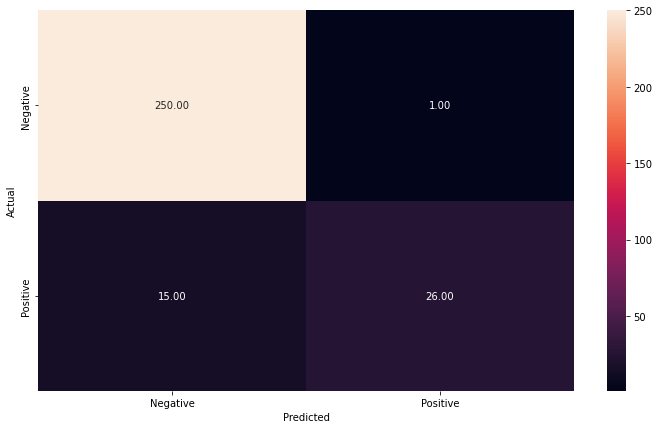

In [163]:
# Checking the performance on the training data

y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Let's check the model performance**

**Reading the confusion matrix (clockwise):**

* True Negative (Actual=0, Predicted=0): Model predicts that a patient is negative and the patient is negative in real too.

* False Positive (Actual=0, Predicted=1): Model predicts that a patient is positive but the patient's case came out as negative.
  
* False Negative (Actual=1, Predicted=0): Model predicts that a patient is negative but the patient's case came out as positive. 

* True Positive (Actual=1, Predicted=1): Model predicts that a patient is positive and patient's case came out as positive.

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.88      0.64      0.74        11

    accuracy                           0.93        74
   macro avg       0.91      0.81      0.85        74
weighted avg       0.93      0.93      0.93        74



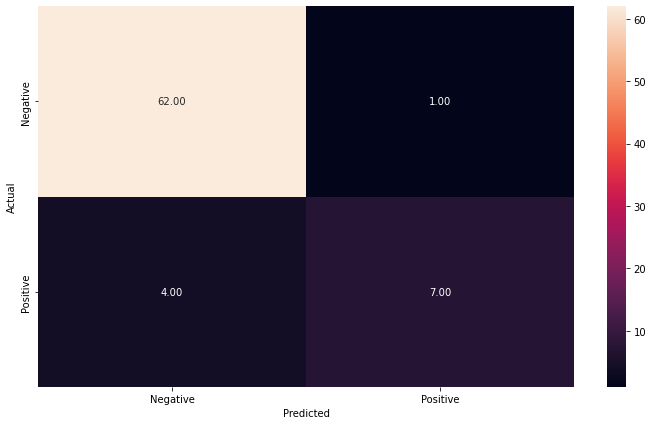

In [164]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- **We are getting an accuracy of around 93%** on train and test dataset.
- On the train and test datasets, however, **the recall** for this model is only about 64% for class 1.
- Due to the low recall, **this model will not perform well** in identifying individuals who have a high likelihood of testing positively for COVID. As a result, it will be difficult to predict if a patient will get COVID.

### Let's analyze the coefficients to determine which factors contribute to COVID's result

In [165]:
# Printing the coefficients of logistic regression

col=X_train.columns
coef_lg=lg.coef_
pd.DataFrame(coef_lg,columns=col).T.sort_values(by=0,ascending=False)

0
patient_addmited_to_regular_ward_(1=yes,_0=no)      1.486380
patient_addmited_to_intensive_care_unit_(1=yes,...  1.314554
patient_addmited_to_semi-intensive_unit_(1=yes,...  0.472057
red_blood_cells                                     0.432156
monocytes                                           0.206255
hem_add                                             0.132191
corpuslar_add                                       0.067548
patient_age_quantile                                0.035532
bordetella_pertussis                                0.000000
parainfluenza_1                                     0.000000
chlamydophila_pneumoniae                            0.000000
parainfluenza_4                                    -0.000842
adenovirus                                         -0.001275
coronavirusnl63                                    -0.012142
coronavirus229e                                    -0.053664
mean_platelet_volume_                              -0.058352
lymphocytes                                        -0.058879
red_blood_cell_distribution_width_(rdw)            -0.088778
influenza_a,_rapid_test                            -0.104971
mean_corpuscular_hemoglobin_concentration (mchc)   -0.109352
basophils                                          -0.150710
influenza_b,_rapid_test                            -0.171548
metapneumovirus                                    -0.214957
coronavirus_hku1                                   -0.228101
respiratory_syncytial_virus                        -0.228223
influenza_a                                        -0.249249
coronavirusoc43                                    -0.363530
parainfluenza_3                                    -0.368996
platelets                                          -0.596879
influenza_b                                        -0.971233
eosinophils                                        -0.996683
leukocytes                                         -1.141876
inf_a_h1n1_2009                                    -1.359865
rhinovirus/enterovirus                             -1.482104

**Observations:**


**Features which positively affect on the COVID's positive case are:**
- patient_addmited_to_regular_ward_(1=yes,_0=no)	
- patient_addmited_to_intensive_care_unit_(1=yes,_0=no)	
- red_blood_cells
- patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)
- monocytes
- corpuslar_add
- influenza_b,_rapid_test
- patient_age_quantile

**Features which negatively affect on the COVID's positive case are:**
- rhinovirus/enterovirus
- inf_a_h1n1_2009
- leukocytes
- influenza_b
- eosinophils	
- platelets
- influenza_a,_rapid_test
- parainfluenza_3
- coronavirusoc43	
- influenza_a
- coronavirus_hku1
- respiratory_syncytial_virus
- metapneumovirus	
- basophils
- red_blood_cell_distribution_width_(rdw)
- mean_corpuscular_hemoglobin_concentration (mchc)
- lymphocytes
- coronavirus229e
- coronavirusnl63
- mean_platelet_volume_
- adenovirus
- parainfluenza_4


### chlamydophila_pneumoniae,bordetella_pertussis and chlamydophila_pneumoniae are almost zero.


**Observations:**

- Based on the Logistic Regression model, patient_addmited_to_regular_ward_(1=yes,_0=no), patient_addmited_to_intensive_care_unit_(1=yes,_0=no), red_blood_cells and patient_addmited_to_semi-intensive_unit_(1=yes,_0=no) are positive important features in detecting whether patient's test will come as positive or not. As an example, Higher red_blood_cells leads to positive covid case.

#### **Precision-Recall Curve for logistic regression**
#### The trade-off between the true positive rate and the positive predictive value for a predictive model employing various probability thresholds is summarized by precision-recall curves

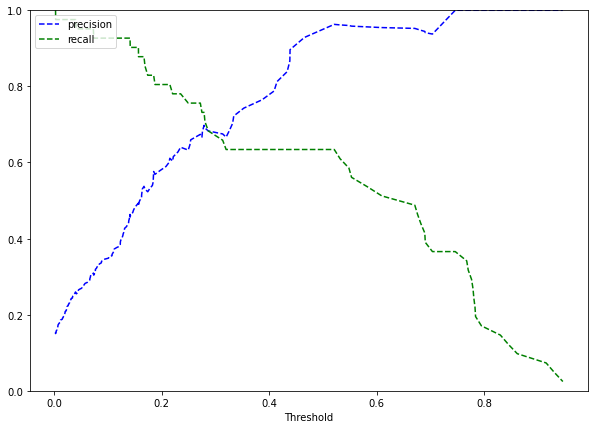

In [166]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [167]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_lg)):
    if precisions_lg[i]>recalls_lg[i]:
        print(thresholds_lg[i])
        break

0.31333334602302815


**Observation:**
- We can see that precision and recall are balanced for a threshold of about ~**0.3133**.

**Let's find out the performance of the model at this threshold**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       251
           1       0.67      0.63      0.65        41

    accuracy                           0.90       292
   macro avg       0.80      0.79      0.80       292
weighted avg       0.90      0.90      0.90       292



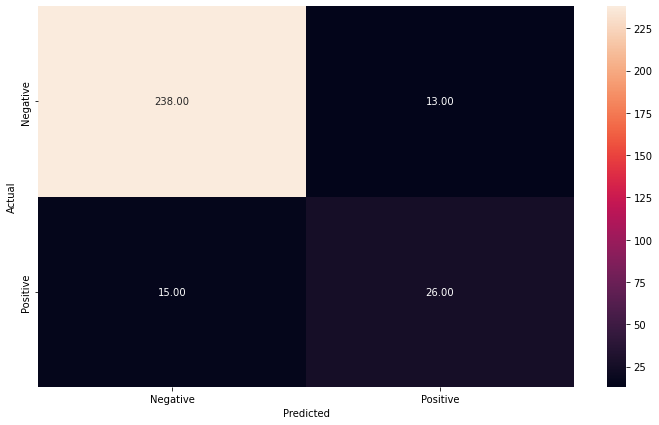

In [168]:
optimal_threshold=thresholds_lg[i]
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

**Observations:**
- The model performance has slighlty improved. The recall has increased significantly for class 1.
**Let's check the performance on the test data.**

              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.90      0.82      0.86        11

    accuracy                           0.96        74
   macro avg       0.93      0.90      0.92        74
weighted avg       0.96      0.96      0.96        74



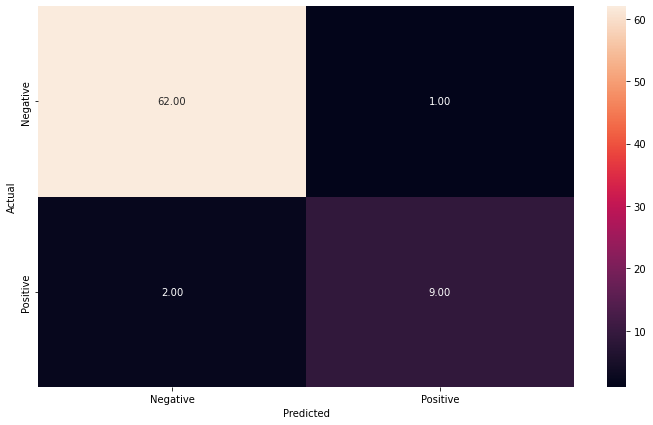

In [169]:
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

**Observations:**
- The model performance has improved. The recall has increased significantly for class 1 from 0.66 to 0.82. However, its being much higher than training's model performance is questinable!

### **Support Vector Machines**

In [170]:
# To Speed-Up SVM training.

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train_scaled = scaling.transform(X_train)
X_test_scaled = scaling.transform(X_test)

#### **Linear Kernel**

In [171]:
# Fitting SVM
svm = SVC(kernel='linear') # Linear kernal or linear decision boundary
model = svm.fit(X= X_train_scaled, y = y_train)

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       251
           1       0.85      0.56      0.68        41

    accuracy                           0.92       292
   macro avg       0.89      0.77      0.82       292
weighted avg       0.92      0.92      0.92       292



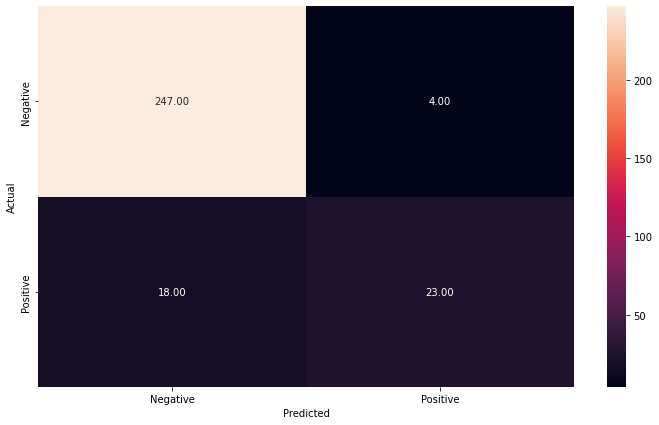

In [172]:
y_pred_train_svm = model.predict(X_train_scaled)
metrics_score(y_train, y_pred_train_svm)

#### Recall is very low with Linear Kernel, therefore, we will try a different kernel. 

#### Recall is around 0.56 in train dataset. Let's try a nonlinear kernel to see that if it improves. 

Let's build the models using **RBF Kernel**

#### **RBF Kernel**

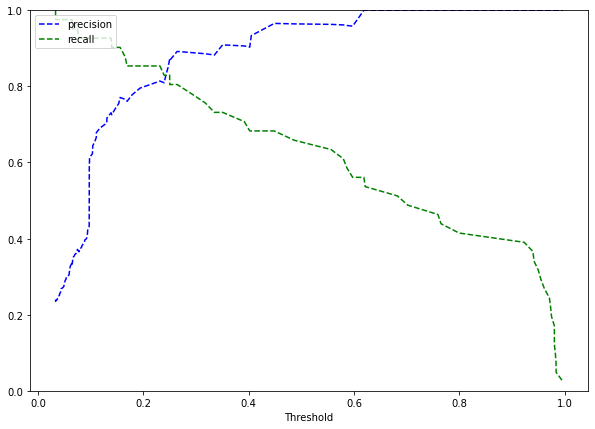

In [178]:
svm_rbf=SVC(kernel='rbf',probability=True)
svm_rbf.fit(X_train_scaled,y_train)
y_scores_svm=svm_rbf.predict_proba(X_train_scaled) # Predict_proba gives the probability of each observation belonging to each class


precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train, y_scores_svm[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_svm, precisions_svm[:-1], 'b--', label='precision')
plt.plot(thresholds_svm, recalls_svm[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [181]:
# Calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds_svm)):
    if precisions_svm[i]>recalls_svm[i]:
        print(thresholds_svm[i])
        break

0.24708486213893502


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       251
           1       0.87      0.83      0.85        41

    accuracy                           0.96       292
   macro avg       0.92      0.90      0.91       292
weighted avg       0.96      0.96      0.96       292



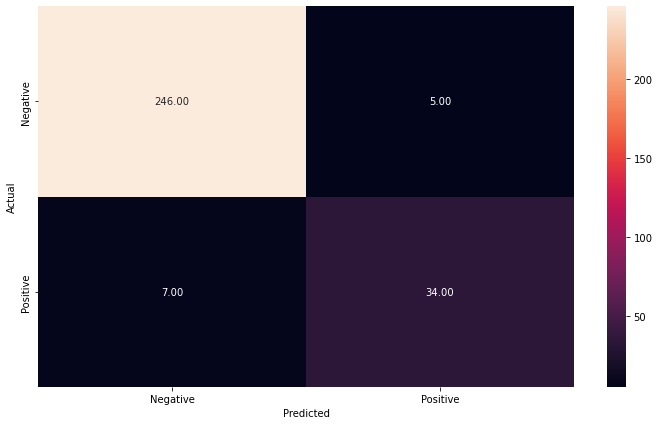

In [182]:
optimal_threshold1=thresholds_svm[i]
y_pred_train = svm_rbf.predict_proba(X_train_scaled)

metrics_score(y_train, y_pred_train[:,1]>optimal_threshold1)

### Recall significanlty improved on train dataset with RBF Kernel with threshold of 0.247

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.82      0.82      0.82        11

    accuracy                           0.95        74
   macro avg       0.89      0.89      0.89        74
weighted avg       0.95      0.95      0.95        74



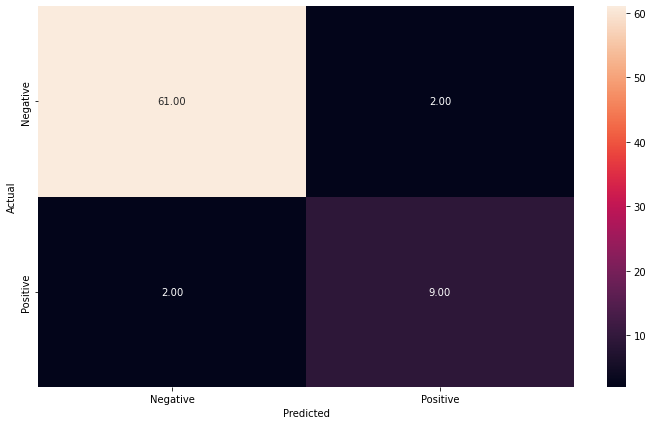

In [177]:
y_pred_test = svm_rbf.predict_proba(X_test_scaled)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**
* At the optimal threshold of .247, the model performance has performed grealty on test dataset.
* Moreover, the kernel used to create this is rbf, hence model is performing good with non-linear kernel.
* As the recall is good, **this model will perform well** in  predicting if the patien's covid case.

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.** 
* If the frequency of class A is 17% and the frequency of class B is 83%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.17, 1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [183]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

In [184]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        41

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



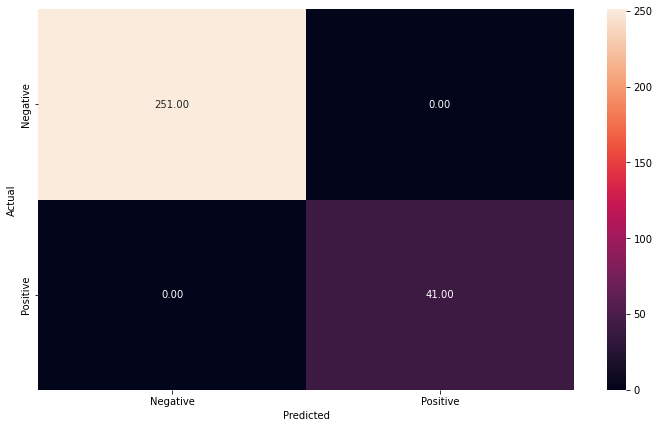

In [186]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observation:**

- For every statistic on the training dataset, the decision tree is returning a **100% score. Clearly, the traindataset has been overfit.

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.64      0.64      0.64        11

    accuracy                           0.89        74
   macro avg       0.79      0.79      0.79        74
weighted avg       0.89      0.89      0.89        74



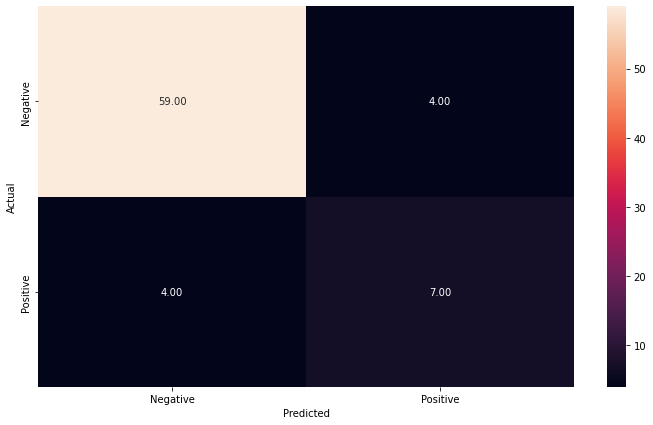

In [187]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Decision Tree performs impressively on the training data, but **not so very well on the test data** because the recall for the test data is 0.64, while it is 1 for the training dataset, indicating that the Decision Tree has overfitted the training data. With 36% percentage, hospitals may be unable to predict positive cases, which is extremely risky for the general public's health and hospital’s business.


#### To overcome the issue of overfitting, I decided to use the tuned model with default values. 

### **Decision Tree** (Tuned Model)

In [272]:
# Choose the type of classifier
dtree_estimator = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(dtree_estimator, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, criterion='entropy',
                       max_depth=5, min_samples_leaf=25, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.78      0.87       251
           1       0.39      0.85      0.54        41

    accuracy                           0.79       292
   macro avg       0.68      0.82      0.70       292
weighted avg       0.89      0.79      0.82       292



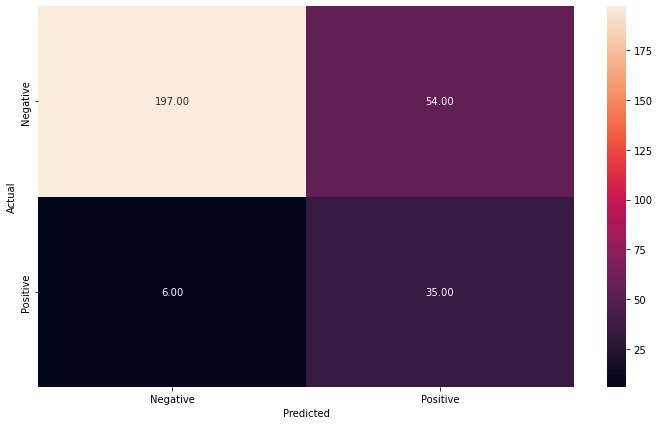

In [279]:
# Checking performance on the training dataset
y_train_pred_dt = dtree_estimator.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

### Let’s see how it performs on test set. Not overfitting but precision is extremely low. 

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        63
           1       0.31      0.73      0.43        11

    accuracy                           0.72        74
   macro avg       0.62      0.72      0.62        74
weighted avg       0.84      0.72      0.75        74



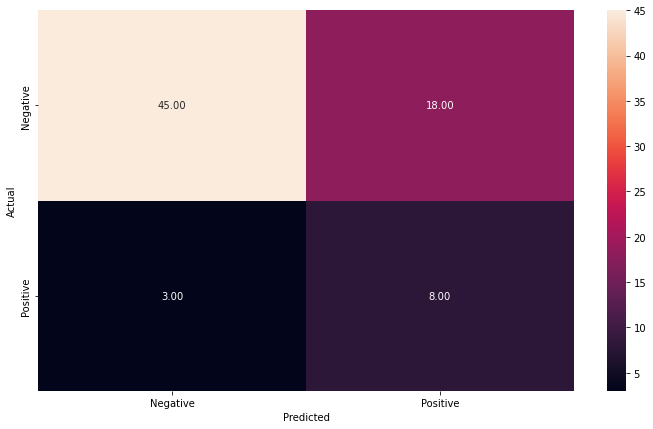

In [280]:
# Checking performance on the test dataset
y_test_pred_dt = dtree_estimator.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

##### Recall performance of the model increased significantly from 0.64 to 0.73, however precision is poor. It indicates that a large percentage of false positives will be created by the tuned model, i.e., the patient will be predicted to have covid while not having it. The hospital will spend time and resources on this.

##### Given the number of features in this dataset and the fact that the decision tree grows until all of its nodes are homogeneous. We are only showing the tree up to **max depth = 4** as a result.

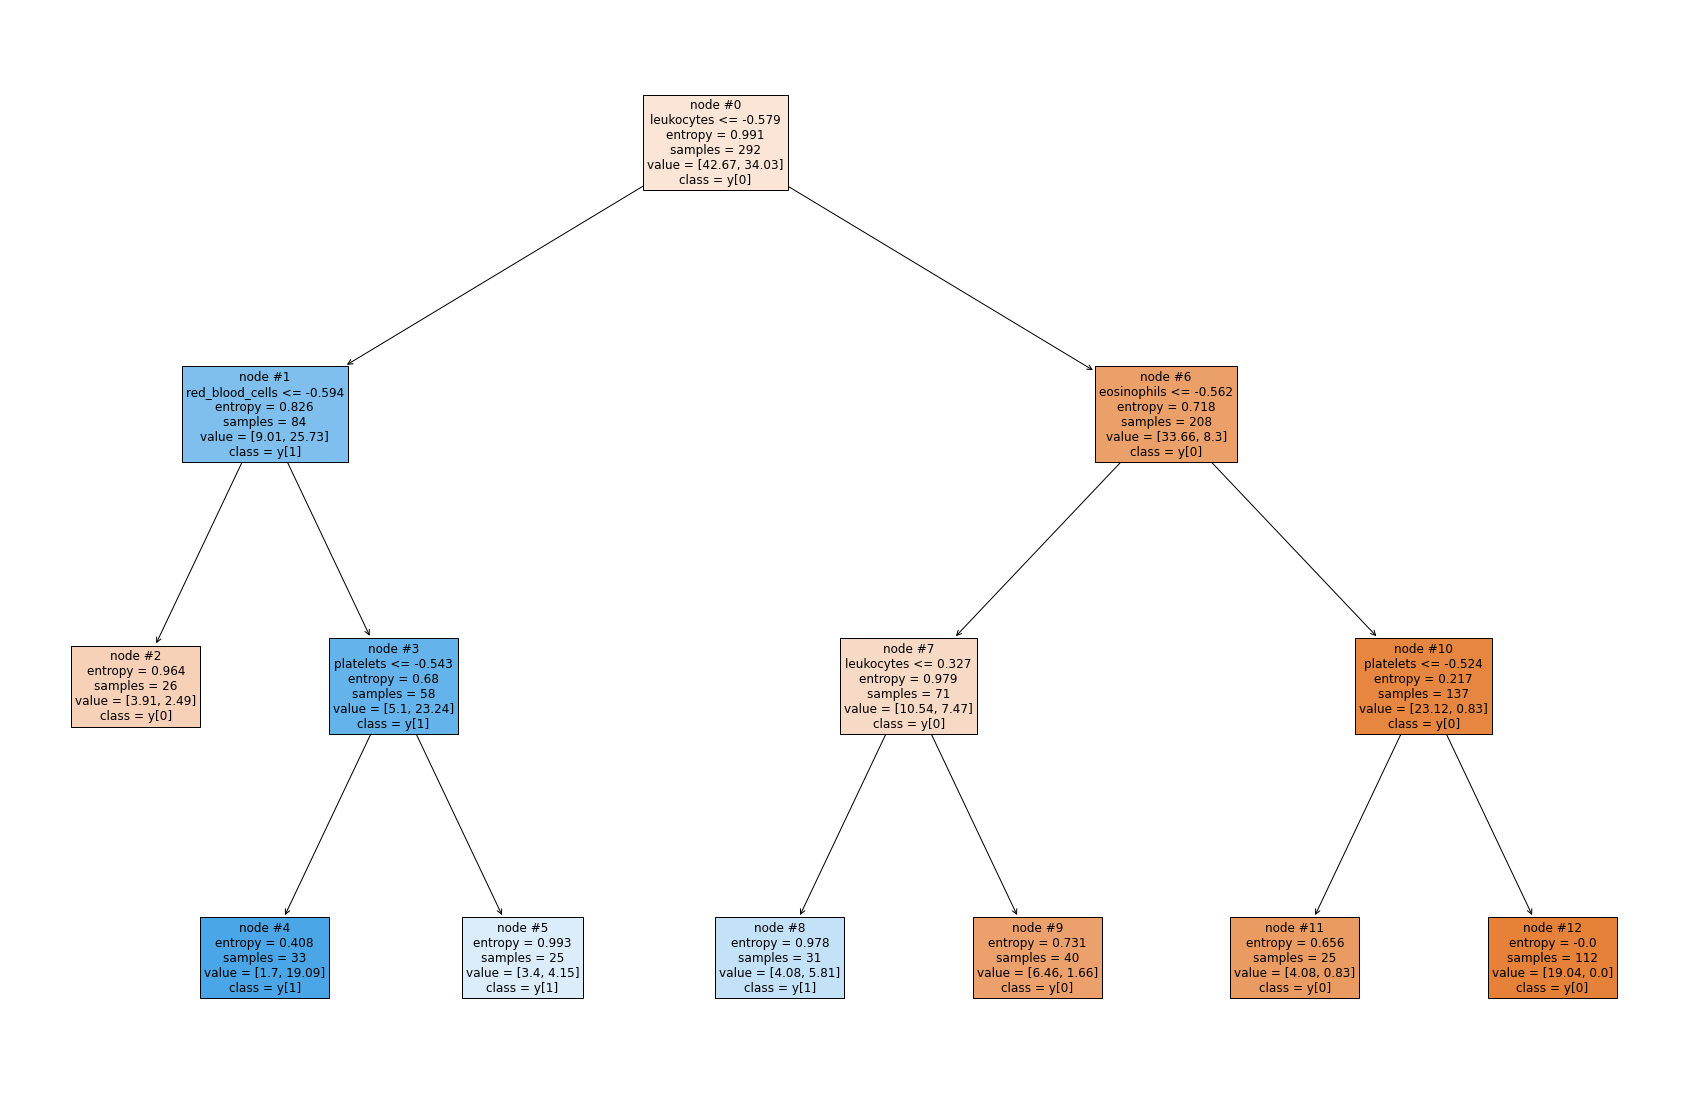

In [278]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dtree_estimator , max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()


#### Leukocytes are at the top on the tree. We observe red blood cells and eosinophils at the second depth.


#### We shall now look into the importance of the feature. This will provide useful insight into which features need to be prioritized.

<AxesSubplot:xlabel='Importance'>

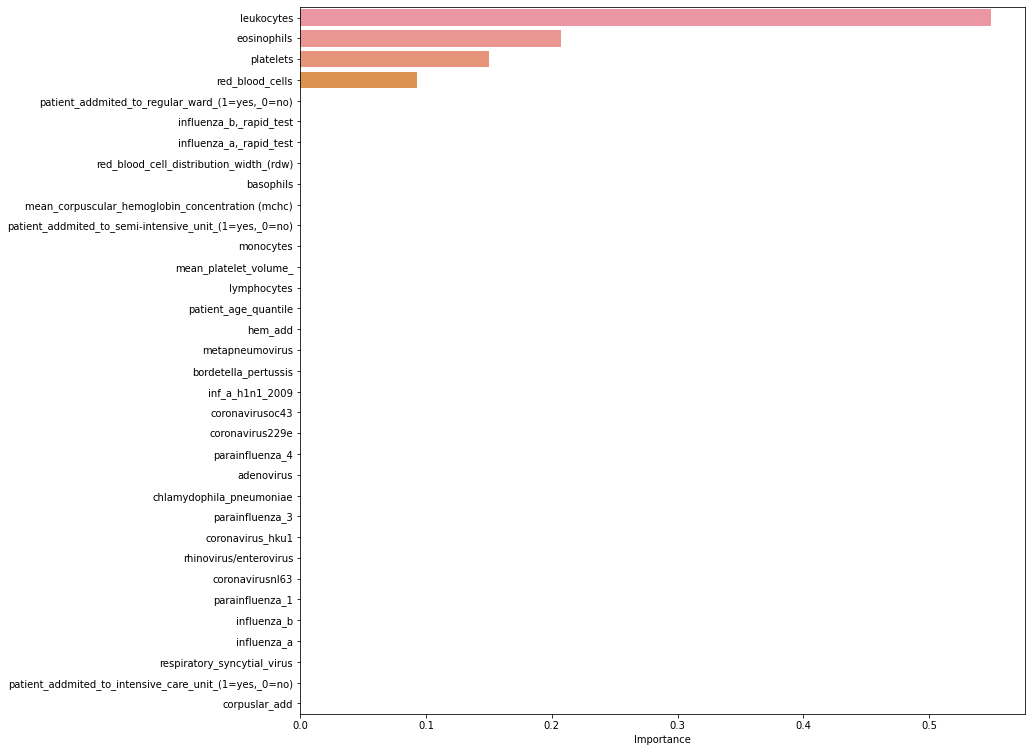

In [281]:
# Plot the feature importance

importances = dtree_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- According to the Decision Tree, **Leukocytes is the most important feature, followed by eosinophills, platelets and red_blood_cells.
- These features values can be associated with COVID's case, such as they may increase with COVID's presence. 
- However, the model's tuning showed that only 4 features significant. This might imply that the model fails to recognize the patterns linked to other variables.

### **Random Forest**

In [282]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       251
           1       1.00      1.00      1.00        41

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292



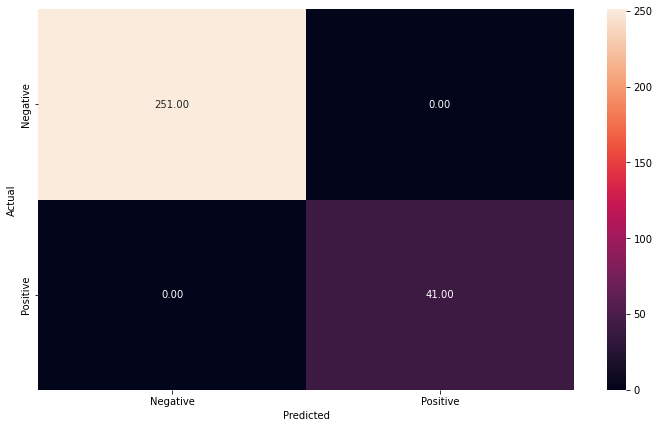

In [283]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

**Observation:**
- For all the metrics in the training dataset, the Random Forest gives a 100% score.

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        63
           1       0.80      0.36      0.50        11

    accuracy                           0.89        74
   macro avg       0.85      0.67      0.72        74
weighted avg       0.88      0.89      0.87        74



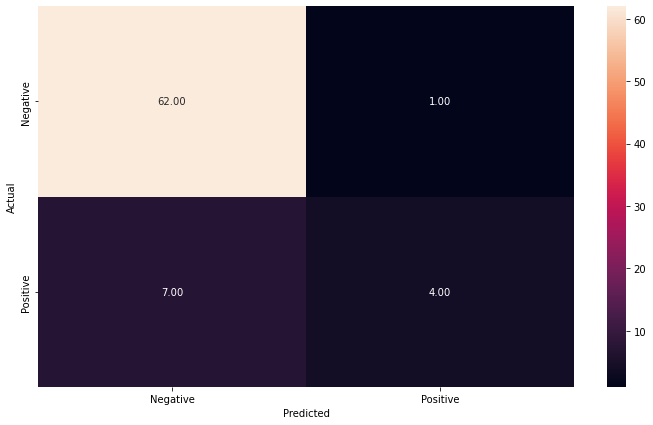

In [284]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

* The random forest is returning 100% scores for all metrics on the training dataset. 

* The train dataset has undoubtedly been overfit. 

* This results in poor performance on the test dataset with recall of 0.36. Hospitals may not be able to predict positive cases with a 64% percentage, which is exceedingly risky for both the general public's health and the hospital's bottom line.


### **Random Forest** (Tuned Model)

In [290]:
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

# Grid of parameters to choose from
params_rf = {  
        "n_estimators": [25, 50, 75, 100, 150],
        "min_samples_leaf": np.arange(1, 4, 1),
        "max_features": [0.7, 0.9, 'auto'],
        "max_depth": [3, 4, 5, 'auto'],
}


# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [291]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=3,
                       min_samples_leaf=2, n_estimators=50, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       251
           1       0.85      0.80      0.83        41

    accuracy                           0.95       292
   macro avg       0.91      0.89      0.90       292
weighted avg       0.95      0.95      0.95       292



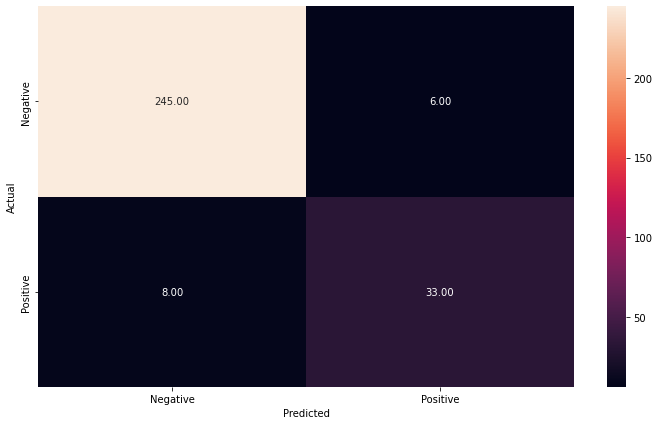

In [292]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(X_train)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        63
           1       0.88      0.64      0.74        11

    accuracy                           0.93        74
   macro avg       0.91      0.81      0.85        74
weighted avg       0.93      0.93      0.93        74



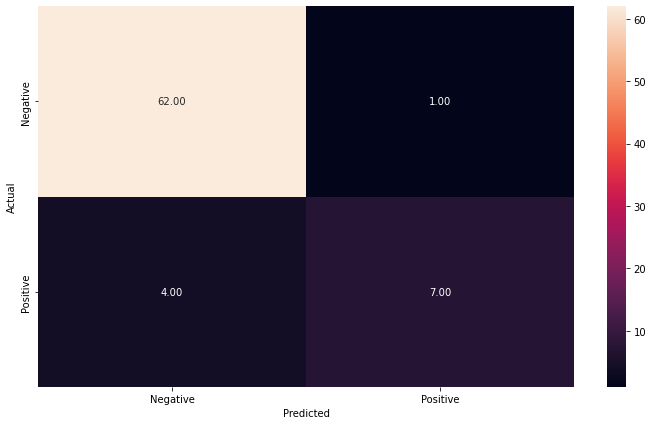

In [293]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_rf_tuned)

**Observations:**

- The tuned model is also slightly overfitting the training dataset, but **it shows a better performance on the test dataset.** Recall increased from 0.36 to 0.64.
- Precision is 0.88, which is much better than decision tree and support vector machine.

<AxesSubplot:xlabel='Importance'>

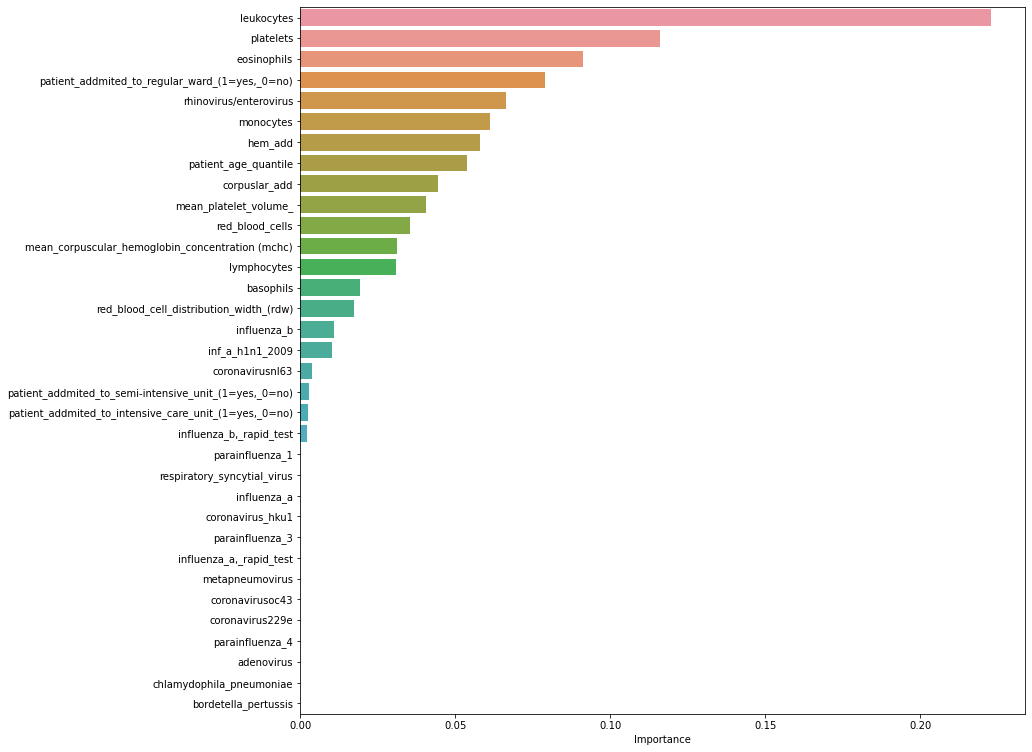

In [295]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)

**Observations:**

- The Random Forest further verifies the results from the decision tree that the most important features are `Leukocytes`, `Plateles`, `Eosinophils`. However, it finds connection with other variables as well. 
- Patient admitted to regular ward also seems to be significant component. It makes sense because it is very likely that people will be admitted to regular ward if they get covid. 
- rhinovirus/enterovirus seems to be associated with covid case because Rhinovirus/Enterovirus (RV/EV) was commonly found (83.3%) in co-infection with SARS-CoV-2 in adults. ###Reference###: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8402816/
- monocytes seems to be correlated with COVID's results because  SARS-CoV-2 patients can show a predominant monocyte-derived macrophage infiltration in the severely damaged lungs ###Reference### https://www.dovepress.com/role-of-monocytesmacrophages-in-covid-19-pathogenesis-implications-for-peer-reviewed-fulltext-article-IDR
- hem_add, which is summation of hemoglobin and hematocrit, is also big component in the COVID's cases. Some research shows that
hemoglobin value was significantly lower in COVID-19 patients with severe disease ###Reference### https://www.the-hospitalist.org/hospitalist/article/220824/coronavirus-updates/severe-covid-19-may-lower-hemoglobin-levels

## **Conclusions:**
- We have tried multiple models and identified the key factors involved with covid's positive and negative cases.
- Of all the models, logistic regression had the best performance. The results of train and test data, however, differ significantly. 
This raises some questions about the model's performance. 
- **SVM with RBF kernel** has good recall (0.82) among all the models with an F-1 score of 0.82, accuracy of 0.95 and precision of 0.82. We recommend the deployment of this model among all other models.
- **Random Forest**has less recall, F1 Score and Accuracy than SVM, but precision is better (0.88). 
- Decision Tree precision is very low (0.31), although the recall is better than Random Forest. The patient will be predicted to have covid 
while not having it. The hospital will spend time and resources on this.